<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/dataset2_NUMMHS_decisiontree/dataset2_NUMMHS_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 목표: 정신건강 서비스 이용 개수(NUMMHS)를 예측하는 결정트리 모델을 구축
- 방법: 관련 플래그 변수들과 병원 관련 변수들을 제외한 나머지 변수들로 학습, 테스트 데이터 분할
- 성능 향상: RandomizedSearchCV를 통해 결정트리 하이퍼파라미터 최적화
- 평가: 테스트 데이터에서 정확도 및 분류 성능 리포트 출력
- 결과 시각화: 학습된 최적 결정트리 구조를 그래프로 표시

최적 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 7}

테스트 정확도: 0.5897

분류 리포트:
               precision    recall  f1-score   support

           0       0.62      0.42      0.50    136250
           1       0.63      0.86      0.73    562152
           2       0.43      0.30      0.36    263386
           3       0.41      0.06      0.10    101734

    accuracy                           0.59   1063522
   macro avg       0.52      0.41      0.42   1063522
weighted avg       0.56      0.59      0.55   1063522



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

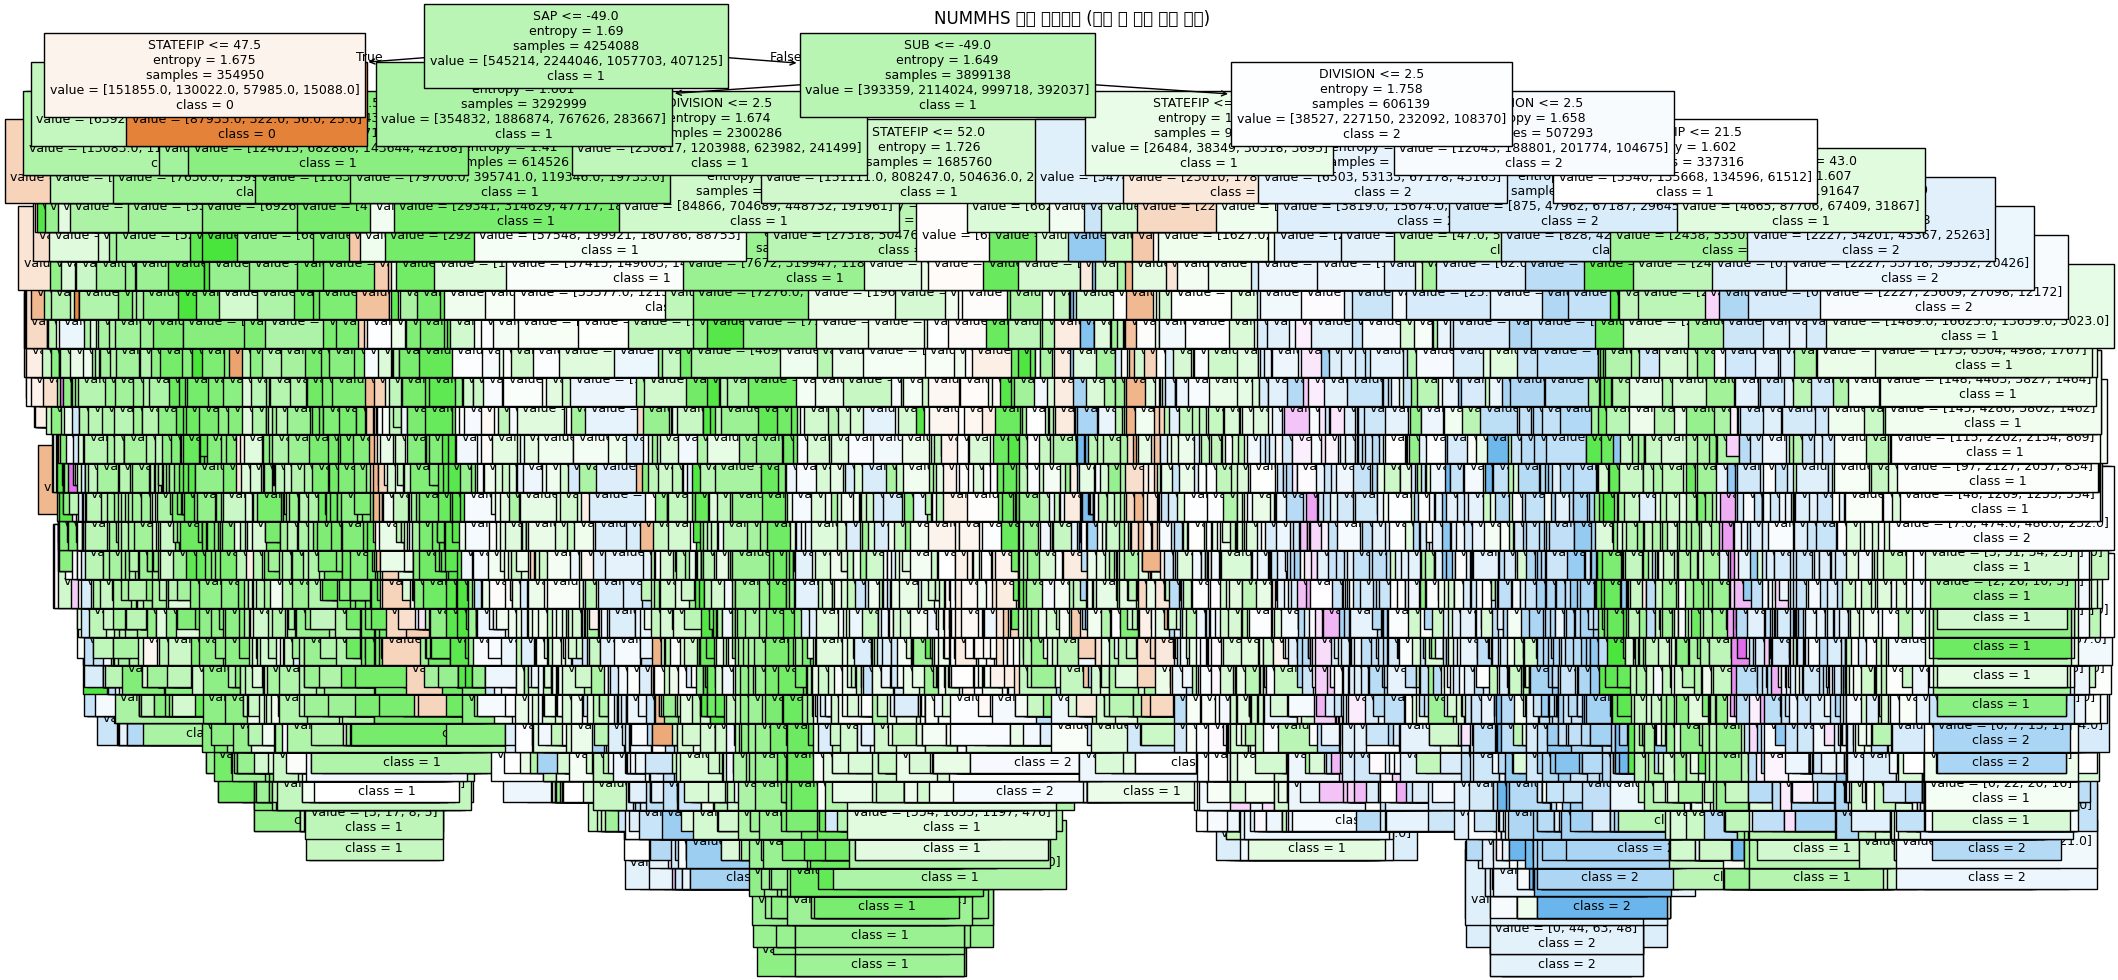

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv")

# 타겟 변수 설정
target_column = "NUMMHS"
y = df[target_column]

# 제외할 열 목록
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE"
]
X = df.drop(columns=excluded_cols)

# 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 탐색 공간
param_distributions = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11),
    "criterion": ["entropy"]
}

# 결정트리 모델 + 랜덤 서치
clf = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# 최적 모델
best_clf_no_region = random_search.best_estimator_
print("최적 하이퍼파라미터:", random_search.best_params_)

# 성능 평가
y_pred = best_clf_no_region.predict(X_test)
print(f"\n테스트 정확도: {accuracy_score(y_test, y_pred):.4f}")
print("\n분류 리포트:\n", classification_report(y_test, y_pred))

# 결정트리 시각화
plt.figure(figsize=(24, 12))
plot_tree(
    best_clf_no_region,
    feature_names=X.columns,
    class_names=[str(c) for c in best_clf_no_region.classes_],
    filled=True,
    fontsize=9
)
plt.title("NUMMHS 예측 결정트리 (지역 및 약물 변수 포함)")
plt.show()


In [ ]:
# 변수 중요도 출력
importances = pd.Series(best_clf_no_region.feature_importances_, index=X.columns)
importances = importances[importances > 0].sort_values(ascending=False)

print("\n변수 중요도 (0이 아닌 항목):")
print(importances)



변수 중요도 (0이 아닌 항목):
STATEFIP    0.468562
DIVISION    0.159644
SAP         0.108811
SUB         0.068734
AGE         0.067235
REGION      0.055834
RACE        0.026359
GENDER      0.017100
DETNLF      0.016286
ETHNIC      0.011437
dtype: float64


- 목표: 병원 변수 및 진단 플래그에 더해 **지역 정보(REGION, DIVISION, STATEFIP)**까지 제거하고, 순전히 **개인 특성만으로 NUMMHS 예측**
- 방법: 지역 변수까지 모두 제외한 데이터셋으로 학습/검증 분할
- 성능 향상: RandomizedSearchCV로 결정트리 하이퍼파라미터(`max_depth`, `min_samples_split`, `min_samples_leaf`) 튜닝
- 평가: 테스트 세트에 대한 정확도 및 분류 리포트로 모델 성능 확인
- 결과 시각화: 지역 변수 없이 훈련된 최적 결정트리 시각화
- 주요 차이점: 사회·정책적 위치 정보 없이, **개인 인구통계학적 요소만으로 예측력 분석** → 예측 한계나 내재적 편향 탐색 가능


최적 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 7}

테스트 정확도: 0.5481

분류 리포트:
               precision    recall  f1-score   support

           0       0.58      0.19      0.28    136250
           1       0.56      0.92      0.70    562152
           2       0.42      0.14      0.21    263386
           3       0.34      0.01      0.02    101734

    accuracy                           0.55   1063522
   macro avg       0.47      0.32      0.30   1063522
weighted avg       0.51      0.55      0.46   1063522



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

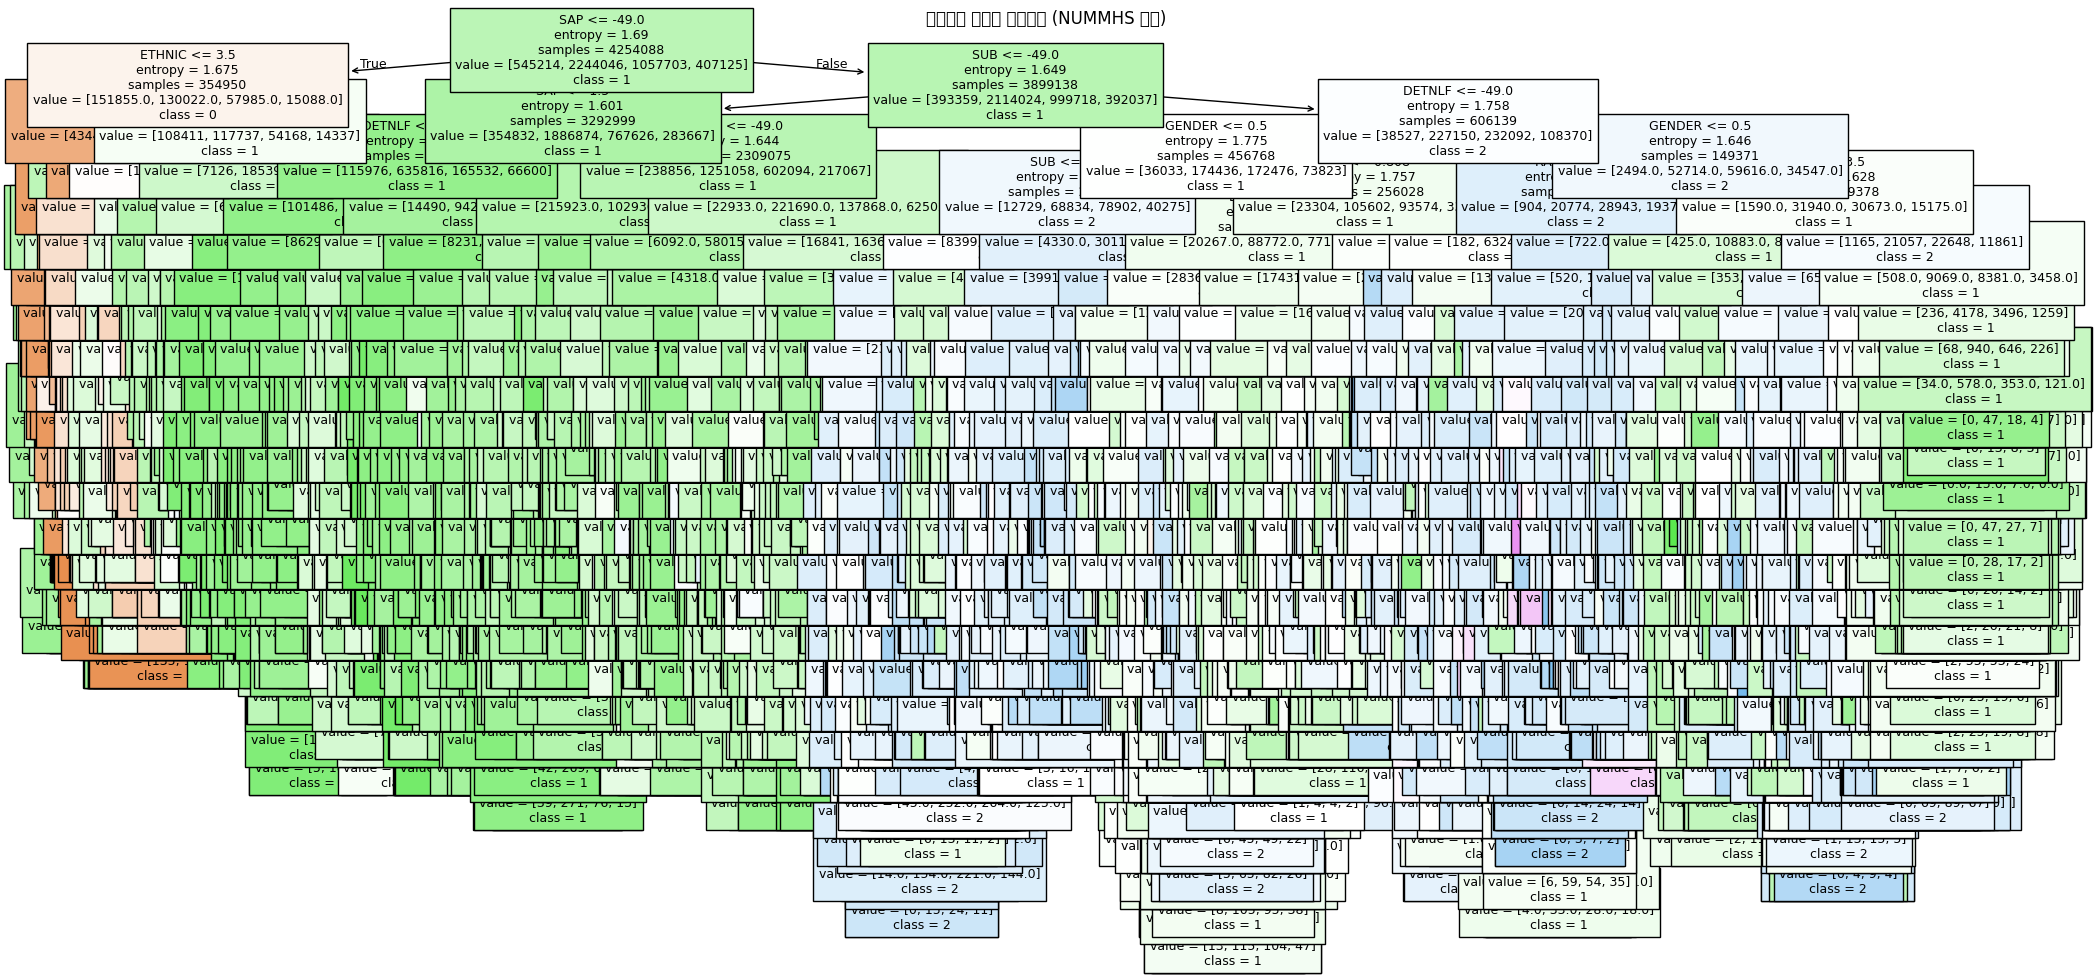

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv")

# 타겟 변수
target_column = "NUMMHS"
y = df[target_column]

# 제외할 열들 (병원, 주, 진단플래그 등)
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE",
    "STATEFIP", "REGION", "DIVISION"  # 여기 추가됨
]
X = df.drop(columns=excluded_cols)

# 학습/검증 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 서치용 하이퍼파라미터 분포
param_distributions = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11),
    "criterion": ["entropy"]
}

# 결정트리 모델 + 랜덤 서치
clf = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# 최적 모델 확인
best_clf_no_region = random_search.best_estimator_
print("최적 하이퍼파라미터:", random_search.best_params_)

# 예측 및 성능 평가
y_pred = best_clf_no_region.predict(X_test)
print(f"\n테스트 정확도: {accuracy_score(y_test, y_pred):.4f}")
print("\n분류 리포트:\n", classification_report(y_test, y_pred))

# 최적 트리 시각화
plt.figure(figsize=(24, 12))
plot_tree(
    best_clf_no_region,
    feature_names=X.columns,
    class_names=[str(c) for c in best_clf_no_region.classes_],
    filled=True,
    fontsize=9
)
plt.title("지역변수 제외한 결정트리 (NUMMHS 예측)")
plt.show()


변수 중요도 (상위 20개):

SAP       0.351189
SUB       0.202170
AGE       0.128001
DETNLF    0.106215
ETHNIC    0.093468
RACE      0.084585
GENDER    0.034372
YEAR      0.000000
dtype: float64


/tmp/ipython-input-5-1059392324.py:15: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1059392324.py:15: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1059392324.py:15: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1059392324.py:15: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1059392324.py:15: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1059392324.py:15: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-1059392324.py:15: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt

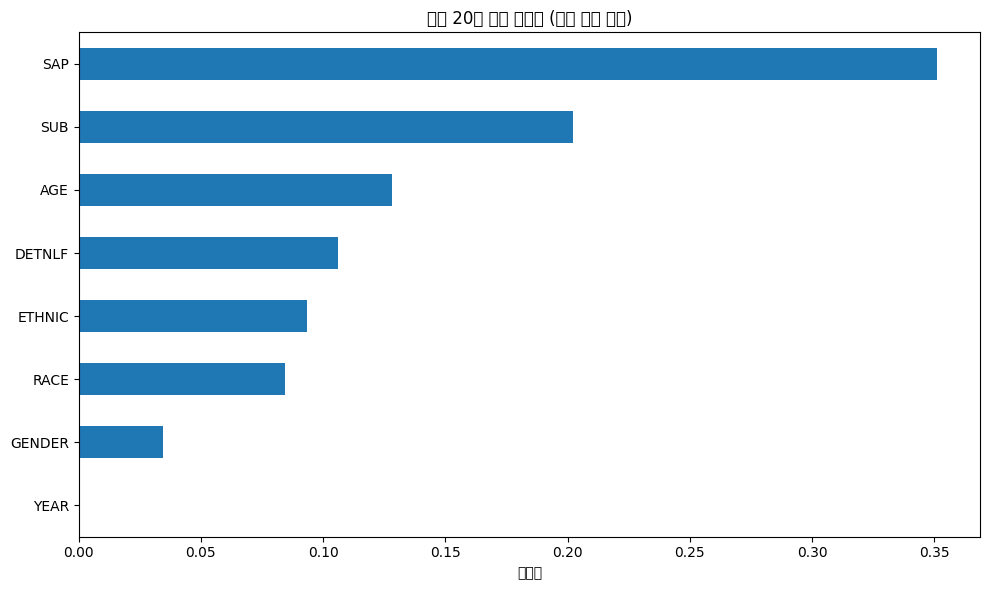

In [ ]:
# 변수 중요도 계산
feature_importance = pd.Series(best_clf_no_region.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# 상위 20개 출력
print("변수 중요도 (상위 20개):\n")
print(feature_importance.head(20))

# 시각화
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(kind='barh')
plt.title("상위 20개 변수 중요도 (지역 변수 제외)")
plt.xlabel("중요도")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

목표:
정신질환 진단 개수(NUMMHS)를 예측할 때, 병원 변수, 진단 플래그, 지역 정보(REGION, DIVISION, STATEFIP), **약물(SAP, SUB)**까지 모두 제거하고, 오직 개인 인구통계학적 특성만으로 예측 가능성을 평가

방법:
위 변수들을 제거한 후, 학습/검증 데이터셋 분할.
이후 DecisionTreeClassifier에 대해 RandomizedSearchCV로 하이퍼파라미터 (max_depth, min_samples_split, min_samples_leaf, criterion) 최적화 수행

성능 향상:
RandomizedSearchCV를 통해 3겹 교차검증 기반으로 10개의 조합을 무작위로 탐색하여 최적의 결정트리 모델 도출

평가:
테스트 데이터셋에서의 정확도(Accuracy) 및 **분류 리포트(classification_report)**를 통해 모델 성능을 수치로 확인

결과 시각화:
최적화된 결정트리 모델을 plot_tree를 통해 시각화.
해당 시각화는 지역 변수, 병원 서비스, 진단 플래그 없이 학습된 순수 개인 특성 기반 예측 구조를 드러냄

주요 차이점:
사회적 맥락(거주 지역, 주 정부 서비스 접근성, 진단 경력 등)을 모두 제거하고도 개인의 인구통계학적 정보만으로 예측이 가능한가를 탐색
→ 정책적/모델적 편향의 가능성이나 예측력의 구조적 한계를 탐색하는 데 기여



최적 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 6}

테스트 정확도: 0.5286

분류 리포트:
               precision    recall  f1-score   support

           0       0.27      0.00      0.00    136250
           1       0.53      0.99      0.69    562152
           2       0.36      0.03      0.05    263386
           3       0.22      0.00      0.00    101734

    accuracy                           0.53   1063522
   macro avg       0.35      0.25      0.19   1063522
weighted avg       0.43      0.53      0.38   1063522



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

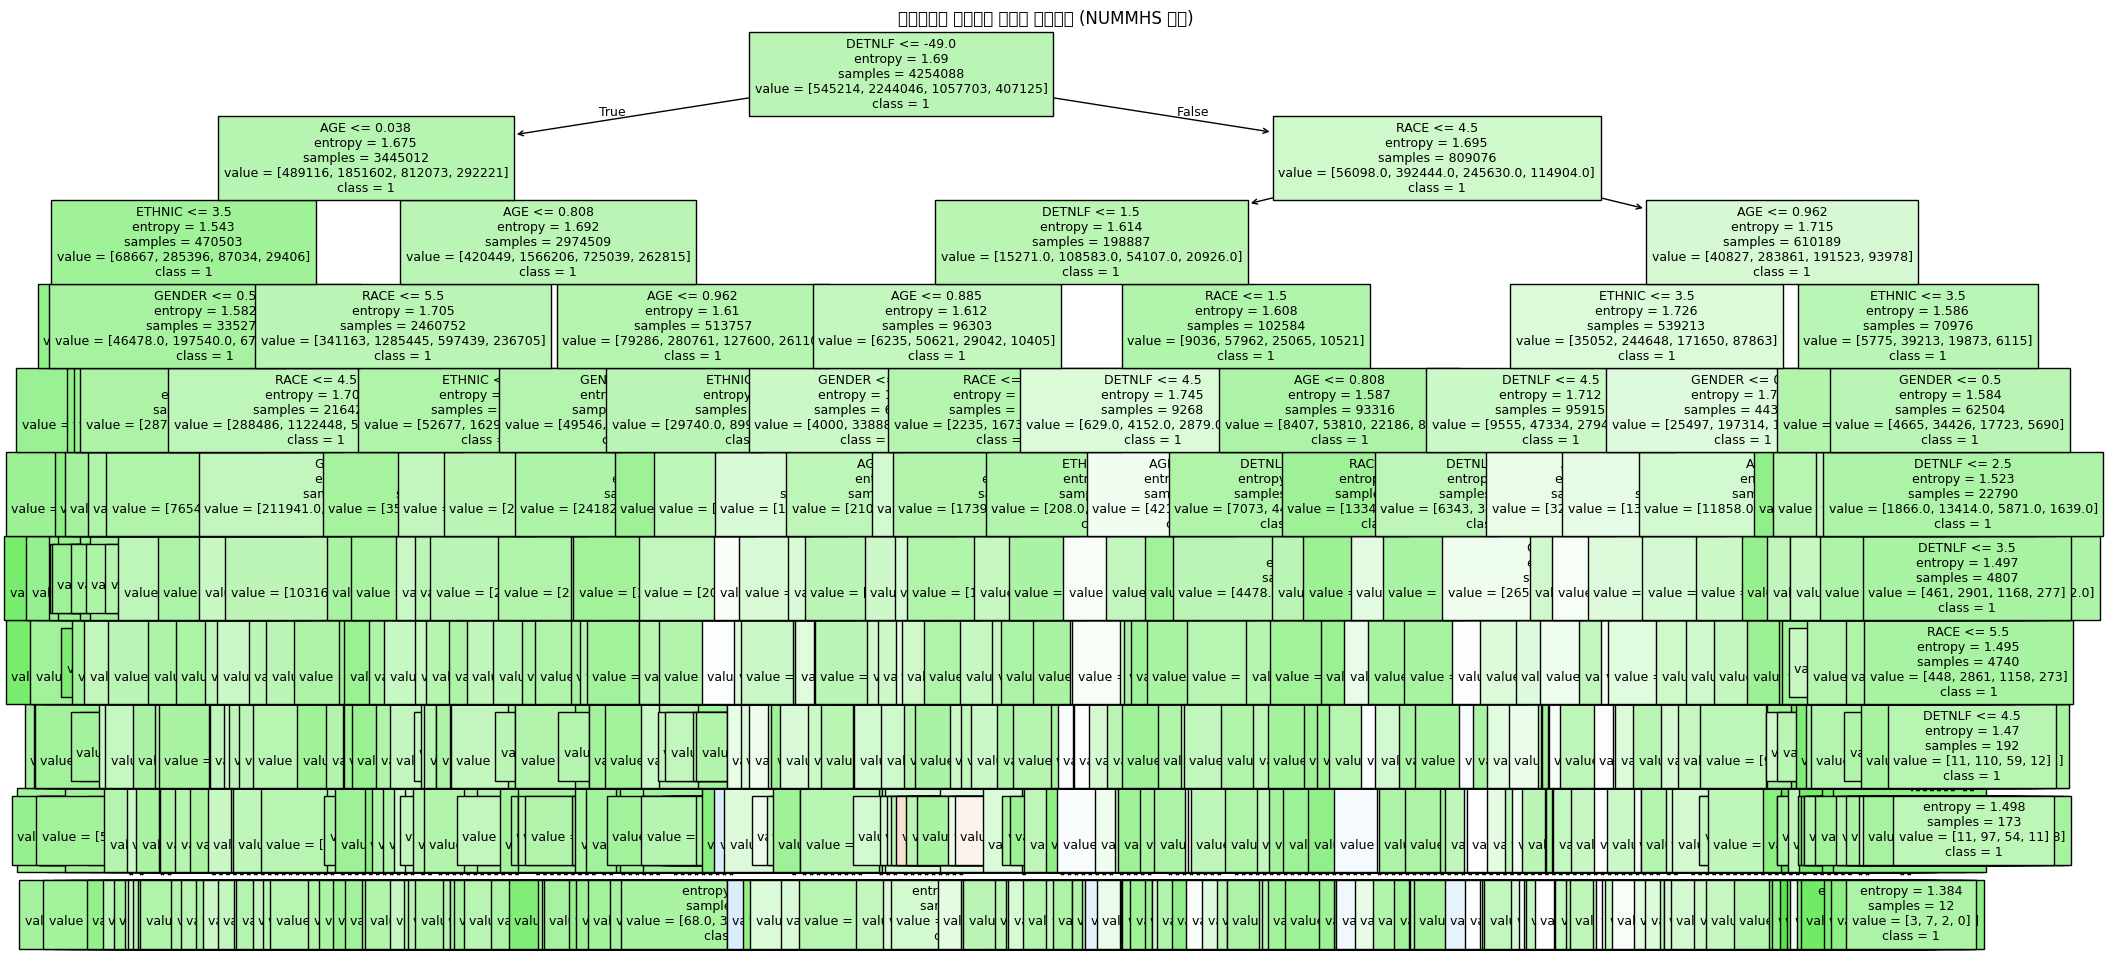

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv")

# 타겟 변수
target_column = "NUMMHS"
y = df[target_column]

# 제외할 열들 (병원, 주, 진단플래그 등)
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE",
    "STATEFIP", "REGION", "DIVISION", "SAP","SUB"  # 여기 추가됨
]
X = df.drop(columns=excluded_cols)

# 학습/검증 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 서치용 하이퍼파라미터 분포
param_distributions = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11),
    "criterion": ["entropy"]
}

# 결정트리 모델 + 랜덤 서치
clf = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# 최적 모델 확인
best_clf_no_region = random_search.best_estimator_
print( "최적 하이퍼파라미터:", random_search.best_params_)

# 예측 및 성능 평가
y_pred = best_clf_no_region.predict(X_test)
print(f"\n테스트 정확도: {accuracy_score(y_test, y_pred):.4f}")
print("\n분류 리포트:\n", classification_report(y_test, y_pred))

# 최적 트리 시각화
plt.figure(figsize=(24, 12))
plot_tree(
    best_clf_no_region,
    feature_names=X.columns,
    class_names=[str(c) for c in best_clf_no_region.classes_],
    filled=True,
    fontsize=9
)
plt.title("지역변수와 약물변수 제외한 결정트리 (NUMMHS 예측)")
plt.show()


- 목표: REGION, SAP, SUB도 포함하지 않고, **단일 결정트리 모델로 NUMMHS 다중 클래스 예측** 수행 → 이들의 영향력 배제 후 모델 성능 확인
- 방법:
  - 진단/병원/지리 정보와 더불어 SAP(서비스 필요도), SUB(물질 사용)까지 모두 제거
  - `max_depth=10`, `class_weight` 없이 단순 결정트리 학습
- 성능 평가: Accuracy와 Macro F1 점수를 통해 **모델 전반적 예측력과 클래스 간 균형 성능** 확인
- 결과 해석:
  - `feature_importances_`로 주요 변수 도출 및 시각화 → **제외한 변수 외에도 예측 기여 요인 파악**
  - 전체 트리 시각화를 통해 **분기 구조와 예측 흐름 시각적 이해 가능**
- 주요 차이점: 중요 변수(SAP, SUB, REGION)를 제거함으로써 **그 외 변수들만으로 예측이 가능한지 확인하는 탈중심 실험**



 Accuracy: 0.5278, Macro F1: 0.1851

Classification Report:

              precision    recall  f1-score   support

           0       0.28      0.00      0.00    136293
           1       0.53      0.99      0.69    561239
           2       0.36      0.03      0.05    264218
           3       0.12      0.00      0.00    101772

    accuracy                           0.53   1063522
   macro avg       0.32      0.25      0.19   1063522
weighted avg       0.42      0.53      0.38   1063522


 Feature Importances:

DETNLF    0.316574
AGE       0.281891
RACE      0.200983
ETHNIC    0.125172
GENDER    0.075380
dtype: float64


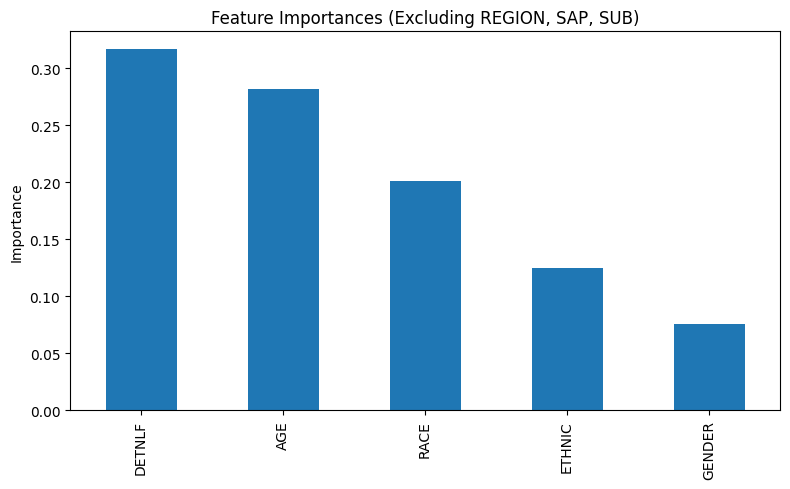

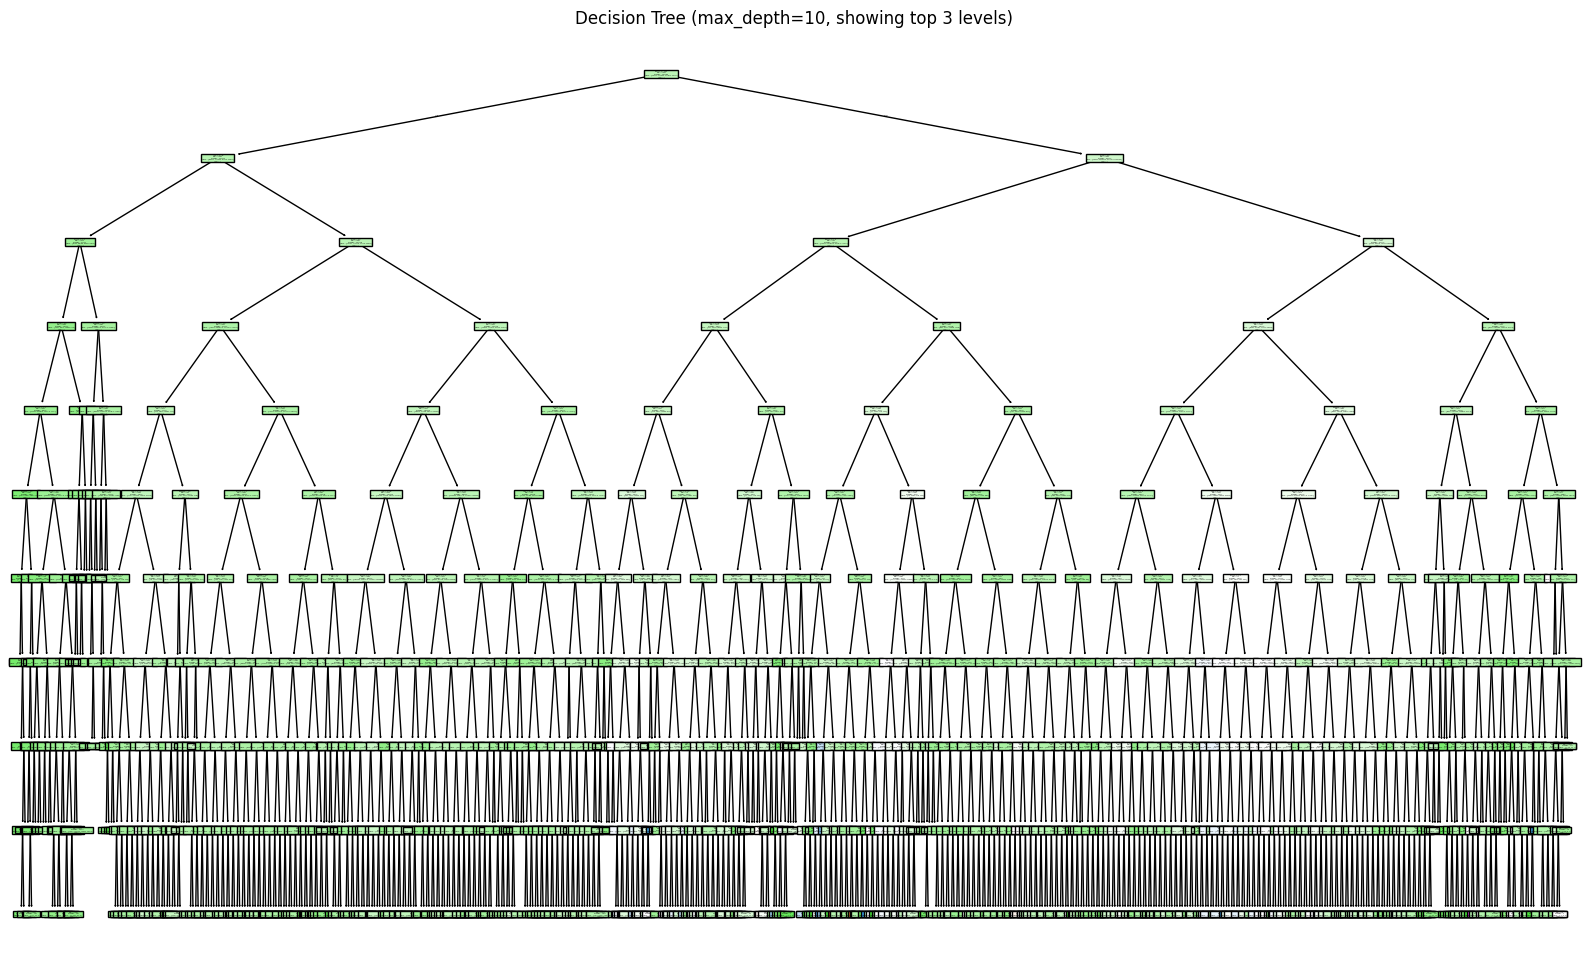

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv")

# 2. 타깃과 제외할 열 정의
target_column = "NUMMHS"
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS", "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG",
    "CONDUCTFLG", "DELIRDEMFLG", "BIPOLARFLG", "DEPRESSFLG", "ODDFLG",
    "PDDFLG", "PERSONFLG", "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED",
    "CASEID", "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE",
    "STATEFIP", "DIVISION", "REGION", "SAP", "SUB"  # REGION, SAP, SUB 제거됨
]

X = df.drop(columns=excluded_cols)
y = df[target_column]

# 3. 학습/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. 단순 결정트리 학습 (max_depth=10, no class_weight)
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f"\n Accuracy: {acc:.4f}, Macro F1: {macro_f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 6. 변수 중요도 출력 및 시각화
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp = feat_imp[feat_imp > 0].sort_values(ascending=False)
print("\n Feature Importances:\n")
print(feat_imp)

plt.figure(figsize=(8, 5))
feat_imp.plot(kind="bar")
plt.title("Feature Importances (Excluding REGION, SAP, SUB)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# 7. 트리 시각화 (선택 사항)
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X.columns, class_names=['0', '1', '2', '3'], filled=True)
plt.title("Decision Tree (max_depth=10, showing top 3 levels)")
plt.show()


변수 중요도 (상위 20개):

DETNLF    0.363250
AGE       0.244879
RACE      0.188772
ETHNIC    0.136573
GENDER    0.066525
YEAR      0.000000
dtype: float64


/tmp/ipython-input-8-3207208715.py:15: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3207208715.py:15: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3207208715.py:15: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3207208715.py:15: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3207208715.py:15: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3207208715.py:15: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-3207208715.py:15: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt

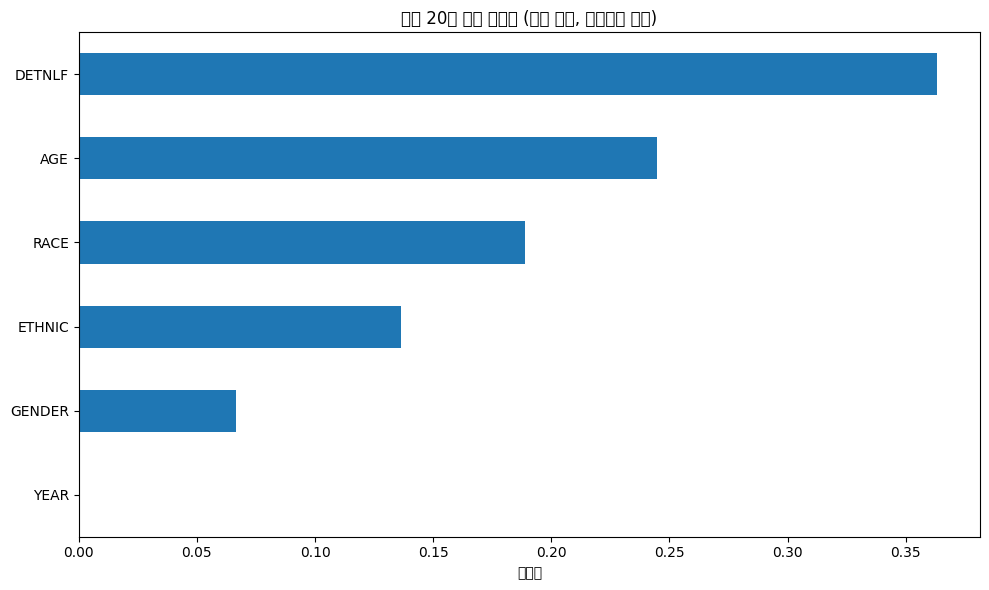

In [ ]:
# 변수 중요도 계산
feature_importance = pd.Series(best_clf_no_region.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# 상위 20개 출력
print("변수 중요도 (상위 20개):\n")
print(feature_importance.head(20))

# 시각화
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(kind='barh')
plt.title("상위 20개 변수 중요도 (지역 변수, 약물변수 제외)")
plt.xlabel("중요도")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

- 목표: 클래스 불균형 문제를 고려하여, **class_weight="balanced"** 옵션을 적용한 결정트리로 NUMMHS 예측 정확도를 넘어 **균형 잡힌 성능(Macro F1)**을 추구
- 방법: 진단/병원/지역 변수 제거 후,(DIVISION만 남김) 다양한 max_depth(5~10)에 대해 반복 실험 → 각 모델의 Accuracy와 Macro F1 Score 비교
- 성능 향상: 정확도 외에도 Macro F1을 기준으로 최적 깊이 선택 → 클래스 간 불균형으로 인한 성능 왜곡 방지
- 평가: 테스트 성능(정확도, F1), 결정 트리 규칙, 변수 중요도, 혼동 행렬 시각화까지 **다층적 평가**
- 결과 시각화: 최적 트리 구조 및 confusion matrix를 그래픽으로 제시하여 모델의 **판단 기준과 예측 경향**을 명확히 파악
- 주요 차이점: 이전 실험들과 달리 **class_weight="balanced"**로 **소수 클래스도 제대로 학습**하도록 조정했으며, **F1 Score 중심 평가**로 모델 균형성 중시


Depth=5 ➤ Accuracy=0.4618, Macro F1=0.3659
Depth=6 ➤ Accuracy=0.4523, Macro F1=0.3762
Depth=7 ➤ Accuracy=0.3898, Macro F1=0.3593
Depth=8 ➤ Accuracy=0.4308, Macro F1=0.3832
Depth=9 ➤ Accuracy=0.4177, Macro F1=0.3798
Depth=10 ➤ Accuracy=0.4271, Macro F1=0.3905

Best Depth (by Macro F1): 10 (Macro F1=0.3905)

Classification Report:

              precision    recall  f1-score   support

           0       0.36      0.58      0.45    136293
           1       0.70      0.46      0.55    561239
           2       0.35      0.23      0.28    264218
           3       0.19      0.56      0.28    101772

    accuracy                           0.43   1063522
   macro avg       0.40      0.46      0.39   1063522
weighted avg       0.52      0.43      0.45   1063522


 Decision Tree Rules:

|--- SAP <= -49.00
|   |--- DIVISION <= 6.50
|   |   |--- DIVISION <= 2.50
|   |   |   |--- DIVISION <= 1.50
|   |   |   |   |--- AGE <= 0.19
|   |   |   |   |   |--- DETNLF <= -48.50
|   |   |   |   |   |   |

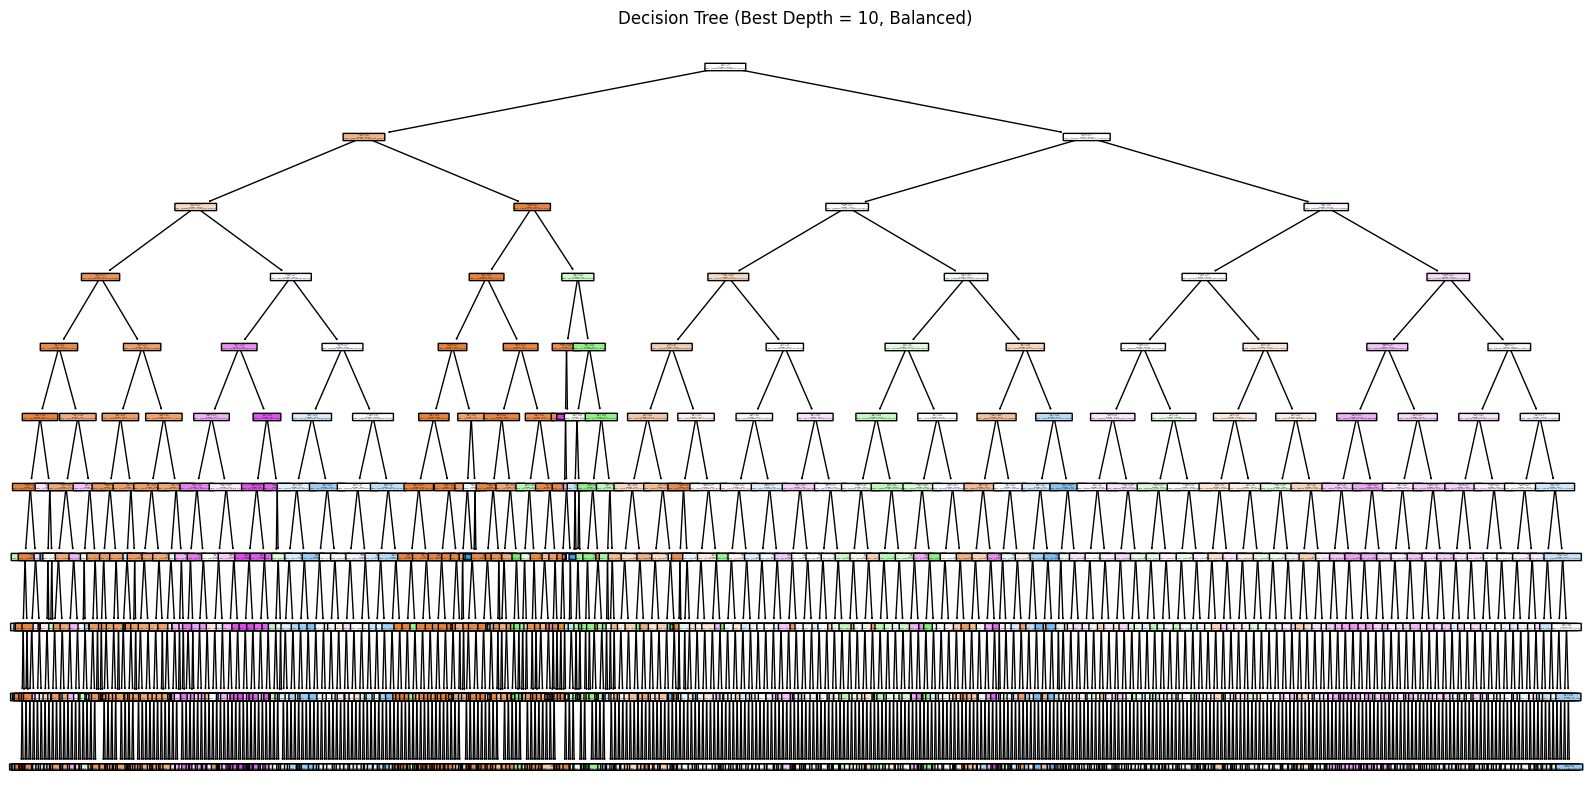

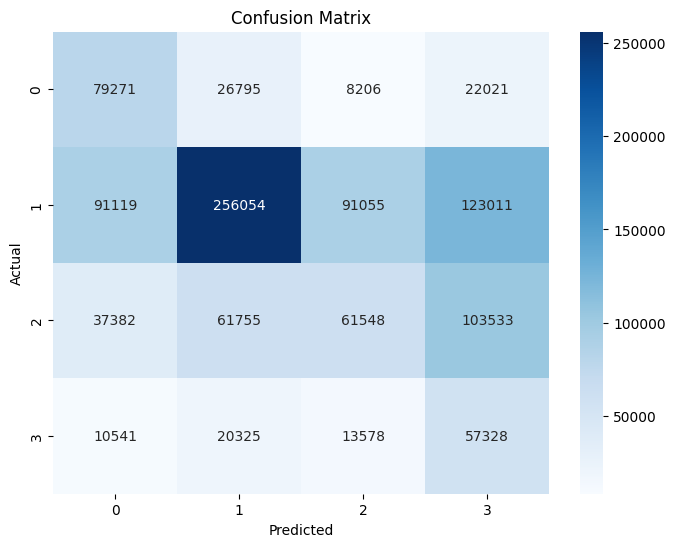

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

# 1. 데이터 로드
FILE_PATH = "단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv"
df = pd.read_csv(FILE_PATH)

# 2-A. 타깃 열 지정
target_column = "NUMMHS"
y = df[target_column]

# 2-B. 학습에서 제외할 열들
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE",
    "STATEFIP", "REGION"
]
X = df.drop(columns=excluded_cols)

# 🔀 3. 학습/검증 세트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# 4. max_depth 실험 (class_weight="balanced")
from collections import defaultdict
from sklearn.metrics import confusion_matrix

depths = [5, 6, 7, 8, 9, 10]
results = {}

for depth in depths:
    model = DecisionTreeClassifier(
        max_depth=depth,
        class_weight="balanced",
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")

    results[depth] = {
        "model": model,
        "accuracy": acc,
        "macro_f1": macro_f1,
        "y_pred": y_pred
    }

    print(f"Depth={depth} ➤ Accuracy={acc:.4f}, Macro F1={macro_f1:.4f}")

# 5. 가장 높은 Macro F1의 depth 선택
best_depth = max(results, key=lambda d: results[d]["macro_f1"])
best_model = results[best_depth]["model"]
best_pred = results[best_depth]["y_pred"]

print(f"\nBest Depth (by Macro F1): {best_depth} (Macro F1={results[best_depth]['macro_f1']:.4f})")

# 6. 성능 출력
print("\nClassification Report:\n")
print(classification_report(y_test, best_pred))

# 7. 트리 규칙 출력
print("\n Decision Tree Rules:\n")
tree_rules = export_text(
    best_model,
    feature_names=list(X.columns),
    max_depth=best_depth
)
print(tree_rules)

#  8. 변수 중요도 출력
importances = best_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
sorted_importances = feat_importances.sort_values(ascending=False)

print("\nFeature Importances (Descending):\n")
print(sorted_importances[sorted_importances > 0])

# 9. 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in best_model.classes_],
    filled=True,
    rounded=True
)
plt.title(f"Decision Tree (Best Depth = {best_depth}, Balanced)")
plt.show()

# 10. Confusion Matrix 시각화 (선택사항)
import seaborn as sns
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


- 목표: 지역 변수 중 **STATEFIP / REGION / DIVISION 중 어떤 것을 남기는 것이 NUMMHS 예측 성능에 가장 유리한지 비교 분석**
- 방법: 나머지 두 지리 변수는 제거하고 하나만 남기는 방식으로 세 가지 조합 구성 → 동일한 하이퍼파라미터 조건(`max_depth=5`, `class_weight='balanced'`)에서 비교
- 성능 평가 기준: 정확도뿐 아니라 **클래스 불균형을 반영한 Macro F1 Score** 기준으로 최종 모델 선택
- 결과 해석: 선택된 모델에서 분류 리포트, 트리 규칙, 변수 중요도 분석 및 시각화로 **가장 예측에 기여한 요인들 파악**
- 주요 차이점: 기존 실험들과 달리 **지리변수 선택의 영향**을 통제하고 비교하며, 최종 모델 성능과 해석력을 함께 확보



조합 실험: STATEFIP_only
Accuracy: 0.4973, Macro F1: 0.3733

조합 실험: REGION_only
Accuracy: 0.4692, Macro F1: 0.3657

조합 실험: DIVISION_only
Accuracy: 0.4618, Macro F1: 0.3659

최종 선택된 조합: STATEFIP_only (Macro F1=0.3733)
\ 최종 모델 성능 보고서:
              precision    recall  f1-score   support

           0       0.54      0.41      0.47    681464
           1       0.61      0.73      0.67   2806198
           2       0.41      0.06      0.10   1321089
           3       0.18      0.44      0.25    508859

    accuracy                           0.50   5317610
   macro avg       0.44      0.41      0.37   5317610
weighted avg       0.51      0.50      0.46   5317610


결정트리 규칙:
|--- SAP <= -49.00
|   |--- STATEFIP <= 47.50
|   |   |--- AGE <= 0.19
|   |   |   |--- STATEFIP <= 10.50
|   |   |   |   |--- STATEFIP <= 8.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- STATEFIP >  8.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- STATEFIP >  10.50
|   |   |   |   |--- STATEFIP <= 30.50
| 

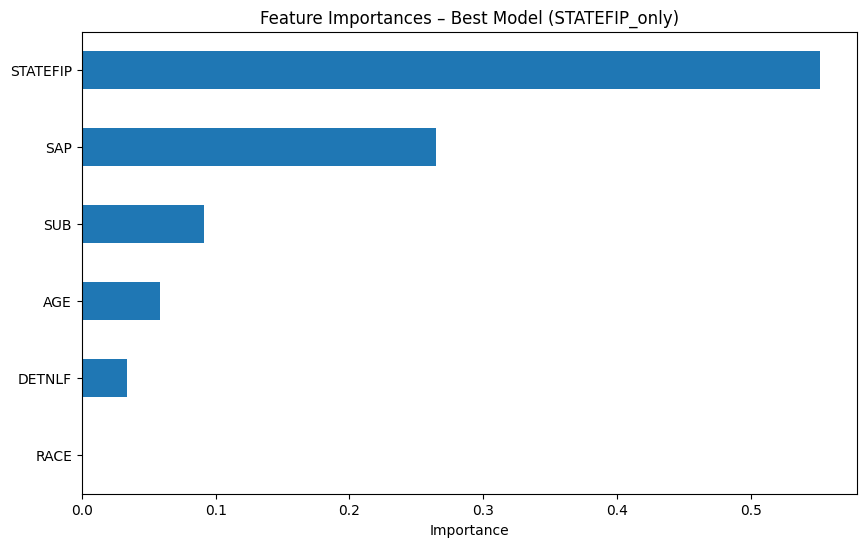

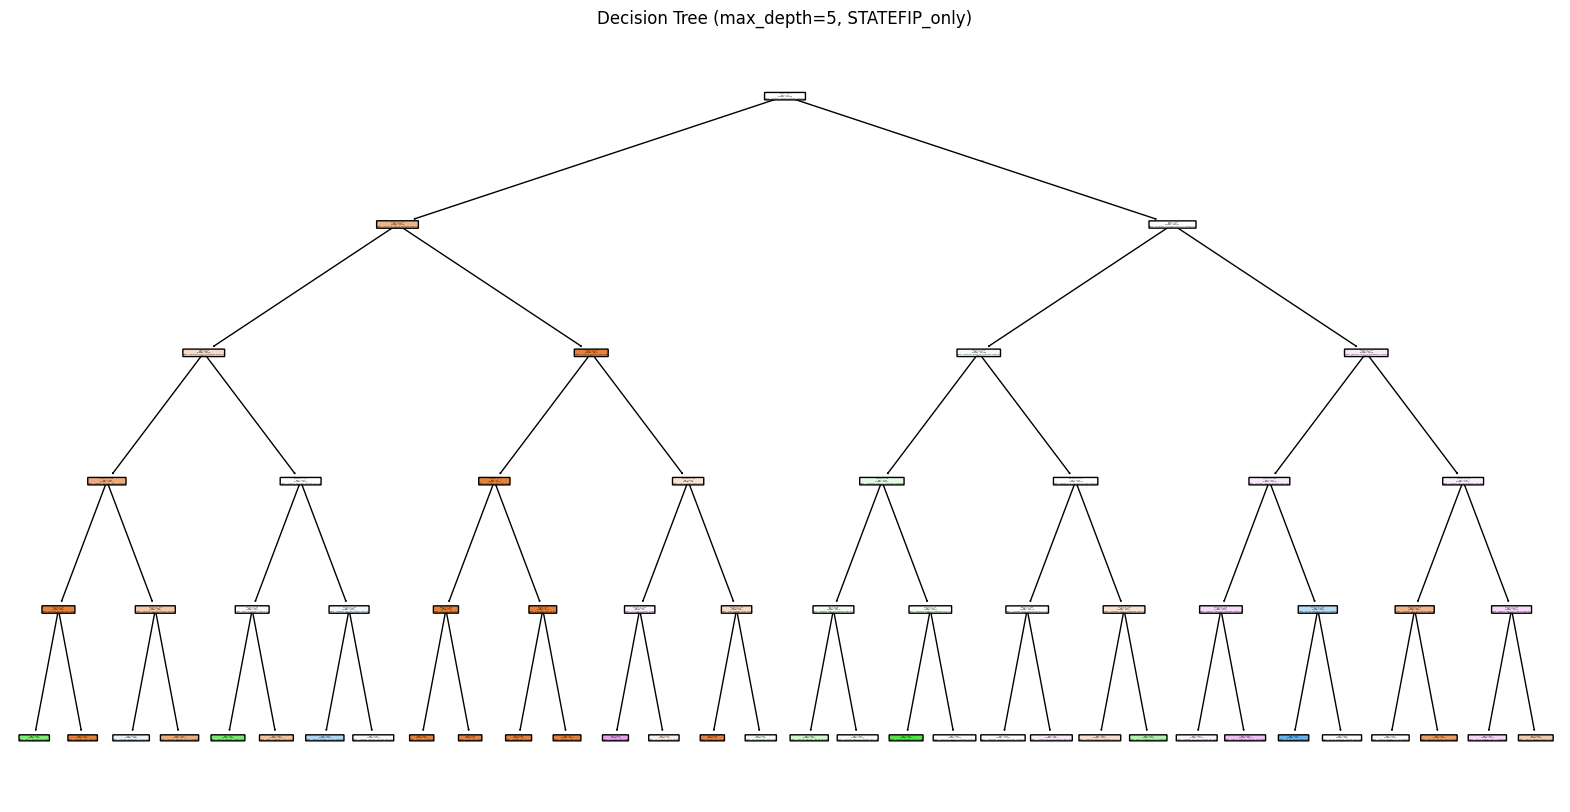

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

# 데이터 불러오기
FILE_PATH = "단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv"
df = pd.read_csv(FILE_PATH)

# 타깃 설정
target_column = "NUMMHS"
y = df[target_column]

# 공통 제외 변수들 (지리정보 제외 전)
base_excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE"
]

# 조합별 비교: 3가지
geo_options = {
    "STATEFIP_only": ["REGION", "DIVISION"],
    "REGION_only": ["STATEFIP", "DIVISION"],
    "DIVISION_only": ["STATEFIP", "REGION"]
}

results = {}

for label, geo_excludes in geo_options.items():
    print(f"\n조합 실험: {label}")

    # 🔧 변수 구성
    excluded_cols = base_excluded_cols + geo_excludes
    X = df.drop(columns=excluded_cols)

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # 깊이 5, 클래스 불균형 보정
    model = DecisionTreeClassifier(
        max_depth=5,
        class_weight="balanced",
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")

    results[label] = {
        "model": model,
        "X": X,
        "y_pred": y_pred,
        "accuracy": acc,
        "macro_f1": macro_f1,
        "excluded_cols": excluded_cols
    }

    print(f"Accuracy: {acc:.4f}, Macro F1: {macro_f1:.4f}")

# 최종 선택: macro F1이 가장 높은 조합
best_label = max(results, key=lambda k: results[k]["macro_f1"])
best_result = results[best_label]
best_model = best_result["model"]
best_X = best_result["X"]
best_pred = best_result["y_pred"]

print(f"\n최종 선택된 조합: {best_label} (Macro F1={best_result['macro_f1']:.4f})")

# Classification report
print("\ 최종 모델 성능 보고서:")
print(classification_report(y, best_model.predict(best_X)))

# 규칙 출력
print("\n결정트리 규칙:")
tree_rules = export_text(
    best_model,
    feature_names=list(best_X.columns),
    max_depth=5
)
print(tree_rules)

# 변수 중요도
importances = best_model.feature_importances_
feat_importances = pd.Series(importances, index=best_X.columns)
sorted_importances = feat_importances.sort_values(ascending=False)

print("\n변수 중요도 (중요도 > 0):")
print(sorted_importances[sorted_importances > 0])

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
sorted_importances[sorted_importances > 0].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title(f"Feature Importances – Best Model ({best_label})")
plt.xlabel("Importance")
plt.show()

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=best_X.columns,
    class_names=[str(cls) for cls in best_model.classes_],
    filled=True,
    rounded=True
)
plt.title(f"Decision Tree (max_depth=5, {best_label})")
plt.show()


In [ ]:
pip install imbalanced-learn


- 목표: NUMMHS 다중 클래스 예측에서 **2단계 분류 전략(stage-wise classification)**을 도입해 클래스 '2'의 예측 성능을 개선
- 방법:
  - **Stage 1**: 클래스 2 vs 나머지(0, 1, 3)을 구분하는 이진 결정트리 학습
  - **Stage 2**: 클래스 2가 아니라고 판단된 샘플에 대해, 0/1/3 중 하나로 재분류하는 결정트리 학습
- 예측 흐름: 테스트셋을 먼저 Stage 1으로 분류 → 클래스 2면 그대로 확정, 아니면 Stage 2 결과로 결정
- 평가: 전체 예측 결과에 대해 Accuracy 및 Macro F1 계산 → **클래스 불균형 고려한 성능 확인**
- 변수 해석: 두 단계 모델의 feature importance를 평균내어 **전체 분류에 중요한 변수 탐색 및 시각화**
- 주요 차이점: 일반 다중분류 모델과 달리 **구조화된 계층적 접근으로 특정 클래스 예측에 집중할 수 있는 전략**



Final Accuracy: 0.4207, Macro F1: 0.3253

Final Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.32      0.39    136293
           1       0.68      0.34      0.46    561239
           2       0.31      0.79      0.44    264218
           3       0.13      0.01      0.01    101772

    accuracy                           0.42   1063522
   macro avg       0.40      0.37      0.33   1063522
weighted avg       0.51      0.42      0.40   1063522


Feature Importances (avg of stage 1 & 2):

REGION    0.350120
SAP       0.295546
SUB       0.256417
RACE      0.033559
DETNLF    0.026777
AGE       0.022644
ETHNIC    0.010277
GENDER    0.004659
dtype: float64


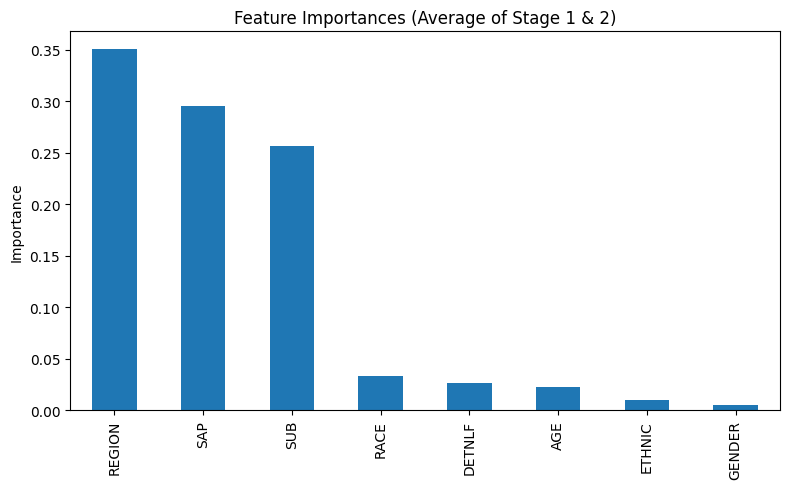

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# 1. 데이터 불러오기
df = pd.read_csv("단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv")

# 2. 타깃과 제외할 열 정의
target_column = "NUMMHS"
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS", "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG",
    "CONDUCTFLG", "DELIRDEMFLG", "BIPOLARFLG", "DEPRESSFLG", "ODDFLG",
    "PDDFLG", "PERSONFLG", "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED",
    "CASEID", "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE",
    "STATEFIP", "DIVISION"  # REGION은 포함
]

X = df.drop(columns=excluded_cols)
y = df[target_column]

# 3. 학습/테스트 세트 분할 (Stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Stage 1: Class 2 vs 나머지 (0, 1, 3)
y_train_stage1 = (y_train == 2).astype(int)
clf_stage1 = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
clf_stage1.fit(X_train, y_train_stage1)

# 5. Stage 2: Class 2 제외, 나머지 0/1/3 학습
mask_not2 = y_train != 2
X_train_stage2 = X_train[mask_not2]
y_train_stage2 = y_train[mask_not2]
clf_stage2 = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
clf_stage2.fit(X_train_stage2, y_train_stage2)

# 6. 예측
stage1_preds = clf_stage1.predict(X_test)
final_preds = []
for i in range(len(X_test)):
    if stage1_preds[i] == 1:
        final_preds.append(2)
    else:
        x_input = X_test.iloc[[i]]
        pred = clf_stage2.predict(x_input)[0]
        final_preds.append(pred)

# 7. 평가
final_preds = np.array(final_preds)
acc = accuracy_score(y_test, final_preds)
macro_f1 = f1_score(y_test, final_preds, average='macro')

print(f"\nFinal Accuracy: {acc:.4f}, Macro F1: {macro_f1:.4f}")
print("\nFinal Classification Report:\n")
print(classification_report(y_test, final_preds))

# 8. 변수 중요도 출력
import matplotlib.pyplot as plt

# 두 모델의 중요도 평균
feat_imp1 = pd.Series(clf_stage1.feature_importances_, index=X.columns)
feat_imp2 = pd.Series(clf_stage2.feature_importances_, index=X.columns)
avg_feat_imp = (feat_imp1 + feat_imp2) / 2
avg_feat_imp = avg_feat_imp[avg_feat_imp > 0].sort_values(ascending=False)

print("\nFeature Importances (avg of stage 1 & 2):\n")
print(avg_feat_imp)

# 시각화
plt.figure(figsize=(8, 5))
avg_feat_imp.plot(kind="bar")
plt.title("Feature Importances (Average of Stage 1 & 2)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


- 목표: NUMMHS 다중 클래스 예측을 위해 **3단계 구조의 계층적 결정트리 분류기** 설계 → 클래스별 분기 구조로 정확도 및 균형 성능 향상 시도
- 방법:
  - **Stage 1**: 클래스 3 vs 나머지 (0, 1, 2)
  - **Stage 2**: 클래스 2 vs 나머지 (0, 1), 단 Stage 1에서 3이 아니라고 분류된 경우에만
  - **Stage 3**: 클래스 0 vs 1, 나머지에서 최종 결정
- 예측 흐름: 샘플마다 순차적으로 3 → 2 → 0/1 판단 → **단계별로 이진 분류 문제로 분해하여 다중 분류 수행**
- 성능 평가: 최종 예측 결과에 대해 Accuracy 및 Macro F1 평가 → 클래스 간 균형 성능 확인
- 변수 해석:
  - 각 단계별 feature importance를 출력
  - 평균 중요도를 별도로 시각화하여 **전반적으로 중요했던 변수 파악**
- 주요 차이점: 일반 다중 분류 모델과 달리, **구조적으로 분기하는 방식**을 통해 특정 클래스의 예측력 향상 가능


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv")

# 2. 타깃과 제외할 열 정의
target_column = "NUMMHS"
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS", "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG",
    "CONDUCTFLG", "DELIRDEMFLG", "BIPOLARFLG", "DEPRESSFLG", "ODDFLG",
    "PDDFLG", "PERSONFLG", "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED",
    "CASEID", "YEAR","CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE",
    "STATEFIP", "DIVISION"  # REGION은 사용
]

X = df.drop(columns=excluded_cols)
y = df[target_column]

# 3. 학습/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Stage 1: Class 3 vs Not 3
y_train_s1 = (y_train == 3).astype(int)
clf_s1 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
clf_s1.fit(X_train, y_train_s1)

# 5. Stage 2: Class 2 vs Not 2 (in Not 3)
mask_not3 = y_train != 3
X_train_s2 = X_train[mask_not3]
y_train_s2 = y_train[mask_not3]
y_train_s2_bin = (y_train_s2 == 2).astype(int)
clf_s2 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
clf_s2.fit(X_train_s2, y_train_s2_bin)

# 6. Stage 3: Class 0 vs 1 (in Not 2, Not 3)
mask_not23 = (y_train != 2) & (y_train != 3)
X_train_s3 = X_train[mask_not23]
y_train_s3 = y_train[mask_not23]
clf_s3 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
clf_s3.fit(X_train_s3, y_train_s3)

# 7. 예측
final_preds = []
for i in range(len(X_test)):
    x_input = X_test.iloc[[i]]  # 경고 방지
    if clf_s1.predict(x_input)[0] == 1:
        final_preds.append(3)
    elif clf_s2.predict(x_input)[0] == 1:
        final_preds.append(2)
    else:
        final_preds.append(clf_s3.predict(x_input)[0])

# 8. 평가
final_preds = np.array(final_preds)
acc = accuracy_score(y_test, final_preds)
macro_f1 = f1_score(y_test, final_preds, average="macro")
print(f"\n Final Accuracy: {acc:.4f}, Macro F1: {macro_f1:.4f}")
print("\n Final Classification Report:\n")
print(classification_report(y_test, final_preds))

# 9. 변수 중요도 출력 (단계별 + 평균)
feat1 = pd.Series(clf_s1.feature_importances_, index=X.columns)
feat2 = pd.Series(clf_s2.feature_importances_, index=X.columns)
feat3 = pd.Series(clf_s3.feature_importances_, index=X.columns)
avg_feat = (feat1 + feat2 + feat3) / 3

print("\n [Stage 1] Feature Importances (Class 3 vs Rest):")
print(feat1[feat1 > 0].sort_values(ascending=False))

print("\n [Stage 2] Feature Importances (Class 2 vs 0,1):")
print(feat2[feat2 > 0].sort_values(ascending=False))

print("\n [Stage 3] Feature Importances (Class 0 vs 1):")
print(feat3[feat3 > 0].sort_values(ascending=False))

print("\n [Average] Feature Importances Across 3 Stages:")
print(avg_feat[avg_feat > 0].sort_values(ascending=False))

# 10. 시각화 (평균 중요도만)
plt.figure(figsize=(9, 5))
avg_feat[avg_feat > 0].sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances (Average of 3 Stages)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

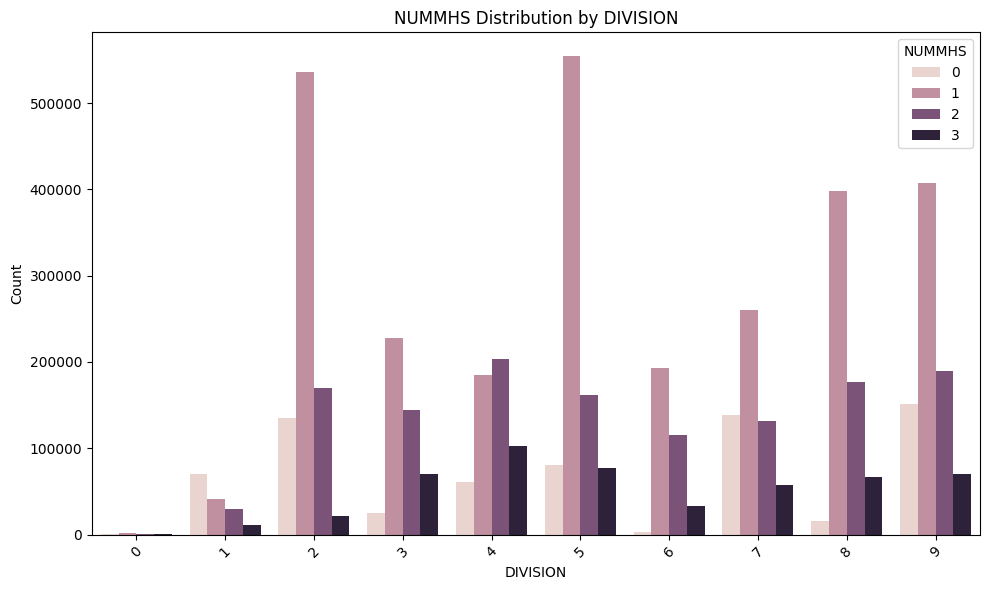

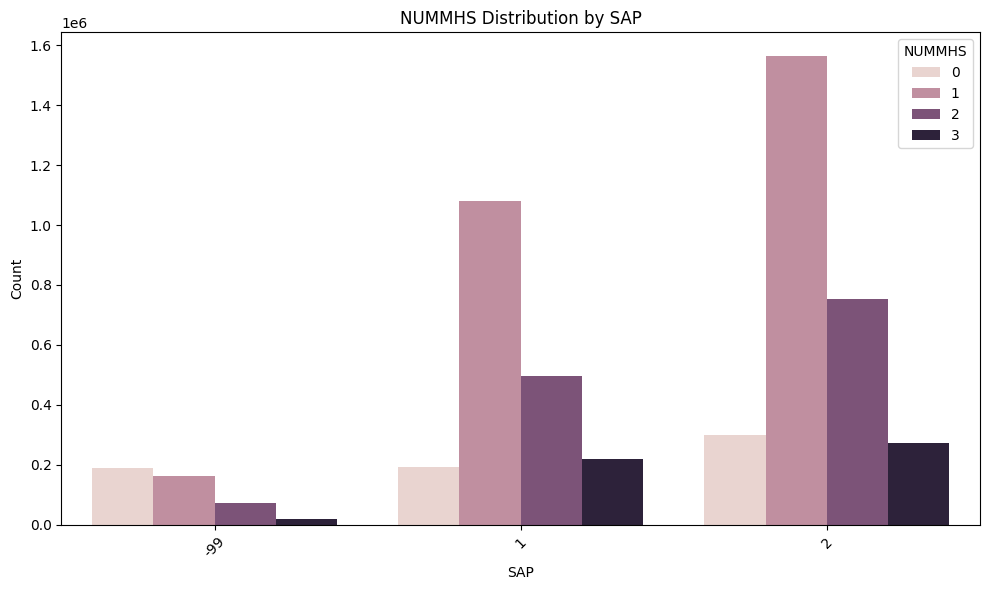

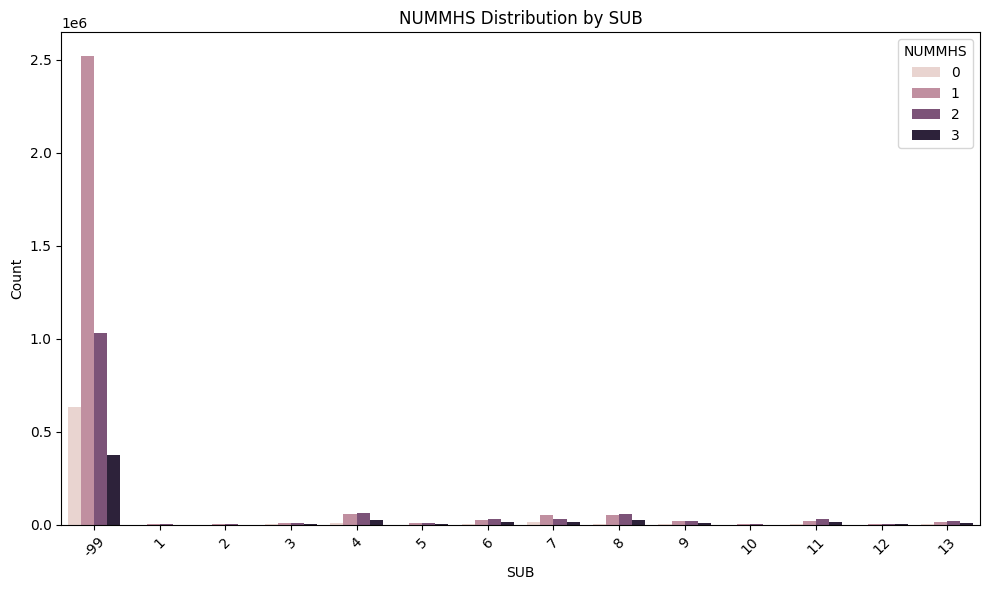

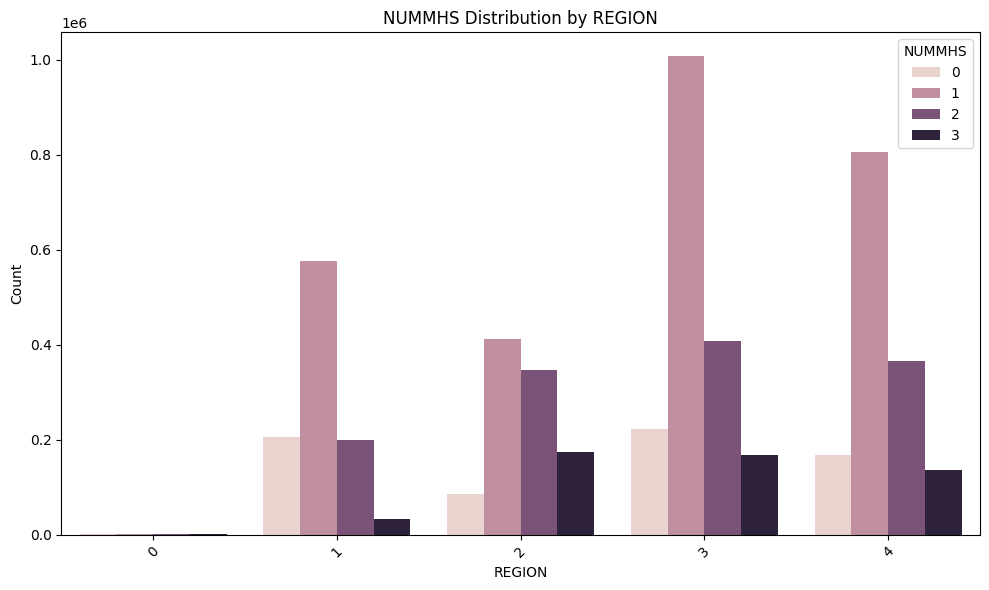

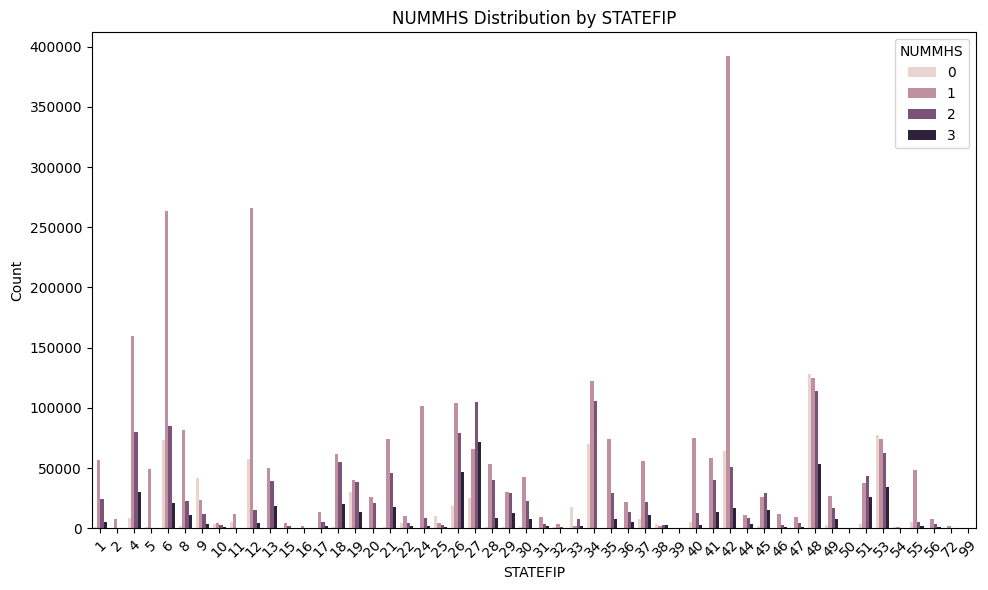

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
df = pd.read_csv("단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv")

# 2. 시각화 대상 변수 리스트
group_vars = ['DIVISION', 'SAP', 'SUB', 'REGION','STATEFIP']
target_var = 'NUMMHS'

# 3. 시각화 함수 정의
def plot_target_distribution_by_group(df, group_var, target_var):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=group_var, hue=target_var)
    plt.title(f'{target_var} Distribution by {group_var}')
    plt.xlabel(group_var)
    plt.ylabel("Count")
    plt.legend(title=target_var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. 각 그룹별 분포 시각화
for var in group_vars:
    if var in df.columns:
        plot_target_distribution_by_group(df, var, target_var)
    else:
        print(f" '{var}' 컬럼이 데이터에 존재하지 않습니다.")


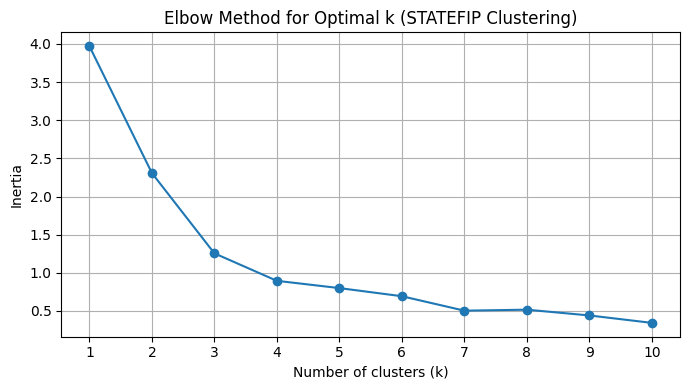

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv")

# 2. STATEFIP별 NUMMHS 클래스 분포 (비율 기반)
state_dist = df.groupby(['STATEFIP', 'NUMMHS']).size().unstack(fill_value=0)
state_ratio = state_dist.div(state_dist.sum(axis=1), axis=0)  # 비율 정규화
state_ratio.columns.name = None


# 3. 엘보우 메소드로 최적 클러스터 개수 찾기
inertias = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(state_ratio)
    inertias.append(model.inertia_)

# 4. 시각화: 엘보우 그래프
plt.figure(figsize=(7, 4))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Optimal k (STATEFIP Clustering)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# 방법 1 : random 모듈 사용
import random

random.seed(42)
# 최종 클러스터 수 결정 후 (예: k=4로 결정했다면)
optimal_k = 4

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
state_ratio['STATEFIP_CLUSTER'] = final_kmeans.fit_predict(state_ratio)

# STATEFIP → 클러스터 매핑
cluster_map = state_ratio['STATEFIP_CLUSTER'].to_dict()
df['STATEFIP_CLUSTER'] = df['STATEFIP'].map(cluster_map)


In [ ]:
# 클러스터별 주(State) 목록 출력
state_cluster_table = state_ratio.reset_index()[['STATEFIP', 'STATEFIP_CLUSTER']]
print(state_cluster_table.sort_values('STATEFIP_CLUSTER'))


    STATEFIP  STATEFIP_CLUSTER
1          2                 0
3          5                 0
9         12                 0
8         11                 0
19        24                 0
51        99                 0
37        42                 0
35        40                 0
48        55                 0
31        36                 1
22        27                 1
23        28                 1
24        29                 1
14        18                 1
16        20                 1
10        13                 1
38        44                 1
36        41                 1
45        51                 1
39        45                 1
21        26                 1
17        21                 1
43        49                 1
44        50                 1
28        33                 2
20        25                 2
29        34                 2
15        19                 2
47        54                 2
46        53                 2
6          9                 2
7       

| 클러스터  | STATEFIP 코드 | 주(지역) 이름             |
| ----- | ----------- | -------------------- |
| **0** | 2           | Alaska               |
|       | 5           | Arkansas             |
|       | 11          | District of Columbia |
|       | 12          | Florida              |
|       | 24          | Maryland             |
|       | 40          | Oklahoma             |
|       | 42          | Pennsylvania         |
|       | 55          | Wisconsin            |
|       | 99          | Other jurisdictions  |
| **1** | 13          | Georgia              |
|       | 18          | Indiana              |
|       | 20          | Kansas               |
|       | 21          | Kentucky             |
|       | 26          | Michigan             |
|       | 27          | Minnesota            |
|       | 28          | Mississippi          |
|       | 29          | Missouri             |
|       | 36          | New York             |
|       | 41          | Oregon               |
|       | 44          | Rhode Island         |
|       | 45          | South Carolina       |
|       | 49          | Utah                 |
|       | 50          | Vermont              |
|       | 51          | Virginia             |
| **2** | 9           | Connecticut          |
|       | 10          | Delaware             |
|       | 19          | Iowa                 |
|       | 25          | Massachusetts        |
|       | 33          | New Hampshire        |
|       | 34          | New Jersey           |
|       | 38          | North Dakota         |
|       | 48          | Texas                |
|       | 53          | Washington           |
|       | 54          | West Virginia        |
| **3** | 1           | Alabama              |
|       | 4           | Arizona              |
|       | 6           | California           |
|       | 8           | Colorado             |
|       | 15          | Hawaii               |
|       | 16          | Idaho                |
|       | 17          | Illinois             |
|       | 22          | Louisiana            |
|       | 30          | Montana              |
|       | 31          | Nebraska             |
|       | 32          | Nevada               |
|       | 35          | New Mexico           |
|       | 37          | North Carolina       |
|       | 39          | Ohio                 |
|       | 46          | South Dakota         |
|       | 47          | Tennessee            |
|       | 56          | Wyoming              |
|       | 72          | Puerto Rico          |


| 클러스터                             | 구성 주(STATEFIP)                                                                                                           | 두드러진 공통점 (요약)                                                                                                                                                                                                                                                           | 대표 근거 (발췌) |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------- |
| **0**<br>(NUMMHS = 1 集中)         | AK 2, AR 5, DC 11, FL 12, MD 24, OK 40, PA 42, WI 55, 99 기타                                                              | • *고소득·도시 인구 비중 높음* — DC·MD·FL 모두 2023년 가계중위소득이 **미국 TOP 10** (DC \$106 k, MD \$101 k). ([census.gov][1], [census.gov][2])  <br>• *자살률 전국 최저권* — DC·NJ·PA 등이 2018 자살 사망률 **하위 5위**. ([cdc.gov][3])  <br>→ **정신질환 진단 1건**이 대다수를 차지한 것은 ‘경증 단계에서 비교적 일찍 의료 접근’ 가능성이 큼.    |            |
| **1**<br>(NUMMHS = 2·3 集中)       | GA 13, IN 18, KS 20, KY 21, MI 26, MN 27, MS 28, MO 29, NY 36, OR 41, RI 44, SC 45, UT 49, VT 50, VA 51                  | • *우울증 유병률 상위권* — KY 27.5 %, TN 25 %, MS 24 %, MO 23 %로 CDC 리포트 **Top 10**에 포함. ([cdc.gov][4])  <br>• *Appalachia·Mid-South 다수* → CDC도 “우울증 고유병 지역”으로 명시. ([cdc.gov][4])  <br>→ 중-고위험(2·3진단) 사례가 몰린 배경과 일치.                                                             |            |
| **2**<br>(NUMMHS = 0 과잉, 1 부족)   | CT 9, DE 10, IA 19, MA 25, NH 33, NJ 34, ND 38, TX 48, WA 53, WV 54                                                      | • *극단적 이분화* — 동북부 고소득(CT, MA, NJ) ↔ Appalachia 최고 유병률(WV) 모두 포함.  <br>• *‘진단 0’ 과다 ↔ 정신건강 인력 부족 심각* — CT는 필요 대비 충원율 **19 %**, TX 33 %로 전국 평균 28 %보다 낮음. ([kff.org][5], [kff.org][6])  <br>→ **“의료공급 부족 → 미진단 상태”** 와 **“고소득 but 낮은 서비스 수요”** 두 하위집단이 섞여 ‘혼합형’으로 보였던 이유. |            |
| **3**<br>(NUMMHS = 0·1 혼합, 일부 3) | AL 1, AZ 4, CA 6, CO 8, HI 15, ID 16, IL 17, LA 22, MT 30, NE 31, NV 32, NM 35, NC 37, OH 39, SD 46, TN 47, WY 56, PR 72 | • *서부·Mountain 주 + 남동부 저소득 주 혼재*  <br>• *자살률 전국 최상위권 포함* — WY 32.3, NM 25.0, MT 24.9(인구 10만명당, 2018). ([cdc.gov][3])  <br>• Montana·Wyoming·New Mexico 등은 SAMHSA 추계 SMI 비율도 **5 %대 후반(미 평균 5.4 %)**. ([samhsa.gov][7])  <br>→ 대도시-농촌, 고(自殺)·중(진단1) 위험 층이 겹친 다층 구조.      |            |

[1]: https://www.census.gov/quickfacts/fact/table/DC/INC110223?utm_source=chatgpt.com "District of Columbia - U.S. Census Bureau QuickFacts"
[2]: https://www.census.gov/quickfacts/fact/table/MD/BZA110222?utm_source=chatgpt.com "Table - U.S. Census Bureau QuickFacts: Maryland"
[3]: https://www.cdc.gov/mmwr/volumes/69/wr/mm6917a4.htm "QuickStats: Age-Adjusted Suicide Rates, by State — National Vital Statistics System, United States, 2018  | MMWR"
[4]: https://www.cdc.gov/mmwr/volumes/72/wr/mm7224a1.htm "National, State-Level, and County-Level Prevalence Estimates of Adults Aged ≥18 Years Self-Reporting a Lifetime Diagnosis of Depression — United States, 2020  | MMWR"
[5]: https://www.kff.org/statedata/mental-health-and-substance-use-state-fact-sheets/connecticut/?utm_source=chatgpt.com "Mental Health and Substance Use State Fact Sheets: Connecticut"
[6]: https://www.kff.org/statedata/mental-health-and-substance-use-state-fact-sheets/texas/?utm_source=chatgpt.com "Mental Health and Substance Use State Fact Sheets: Texas | KFF"
[7]: https://www.samhsa.gov/data/sites/default/files/reports/rpt42790/adults-with-smi-and-children-with-sed-prevalence-estimates-in-2022.pdf "adults with SMI and children with SED prevalence in 2022"


| 클러스터                     | 핵심 느낌                                                                                                                                                                                                                                            | 왜 그런 숫자가 나왔을까? (쉽게 설명) |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ---------------------- |
| **0번 – “경증·조기 진단형”**     | `NUMMHS`가 1개인 사람이 압도적이잖아? → **일찍 한두 번 진단 받고 바로 치료**한 케이스가 많다는 뜻. 이 그룹엔 **DC·메릴랜드·플로리다·펜실베이니아**처럼 **소득이 높고(예: 메릴랜드 \$101k) 의료 접근성 좋은** 곳이 섞여 있어. DC·NJ 같은 곳은 자살률도 미국 최저권이라 심각 사례가 적은 편이고. ([census.gov][1], [cdc.gov][2])                         |                        |
| **1번 – “중·고위험 집중형”**     | 여기선 `NUMMHS` 2\~3이 확 튀어나오지? 실제로 **켄터키·미시시피·미주리** 등은 **우울증 유병률 Top 10**에 드는 곳이고, 애팔래치아·미드사우스 벨트 전체가 CDC에서 고위험 지역으로 찍혀 있어. 그래서 *같은 클러스터 안에서도* 이미 심각도가 높은 사람들이 몰려 있는 거야. ([cdc.gov][3])                                                             |                        |
| **2번 – “미진단/혼합형”**       | 숫자 0이 과하게 많고 1은 부족했지? 두 하위집단이 섞여 있어. ① **코네티컷·매사추세츠·뉴저지** 같은 **고소득 주** – 정신건강 문제가 적어서일 수도 있고, ② **텍사스·웨스트버지니아**처럼 **정신건강 인력이 턱없이 부족**(필요 대비 19 \~ 33 % 수준)해 **아예 진단을 못 받는** 경우도 있어. 그래서 “진단 0”과 “진단 2”가 동시에 튀어나온 거. ([kff.org][4], [kff.org][5]) |                        |
| **3번 – “자살률·농촌 고위험 섞임”** | 몬태나·와이오밍·뉴멕시코 같은 **자살률 최상위** Mountain West 주랑, 앨라배마·루이지애나 같은 **저소득 남부** 주가 한데 모였어. 농촌·총기 보유율·낮은 의료 접근 같은 요인이 겹치니까 한쪽(0\~1진단)엔 “경증이지만 방치”, 다른 쪽(3진단)은 “터질 만큼 악화돼서 뒤늦게 진단”이 같이 나타나는 다층 구조가 된 거야. ([cdc.gov][2])                                    |                        |

[1]: https://www.census.gov/quickfacts/fact/table/MD/BZA110222?utm_source=chatgpt.com "Table - U.S. Census Bureau QuickFacts: Maryland"
[2]: https://www.cdc.gov/mmwr/volumes/69/wr/mm6917a4.htm?utm_source=chatgpt.com "QuickStats: Age-Adjusted Suicide Rates, by State — National Vital"
[3]: https://www.cdc.gov/mmwr/volumes/72/wr/mm7224a1.htm?utm_source=chatgpt.com "National, State-Level, and County-Level Prevalence - CDC"
[4]: https://www.kff.org/statedata/mental-health-and-substance-use-state-fact-sheets/connecticut/?utm_source=chatgpt.com "Mental Health and Substance Use State Fact Sheets: Connecticut"
[5]: https://www.kff.org/statedata/mental-health-and-substance-use-state-fact-sheets/texas/?utm_source=chatgpt.com "Mental Health and Substance Use State Fact Sheets: Texas | KFF"



질환 개수 분포 (비율):


NUMMHS                   0         1         2         3
STATEFIP_CLUSTER                                        
0                 0.114938  0.785801  0.076735  0.022526
1                 0.037649  0.420929  0.368267  0.173156
2                 0.308407  0.321077  0.280472  0.090044
3                 0.076016  0.609177  0.236624  0.078184

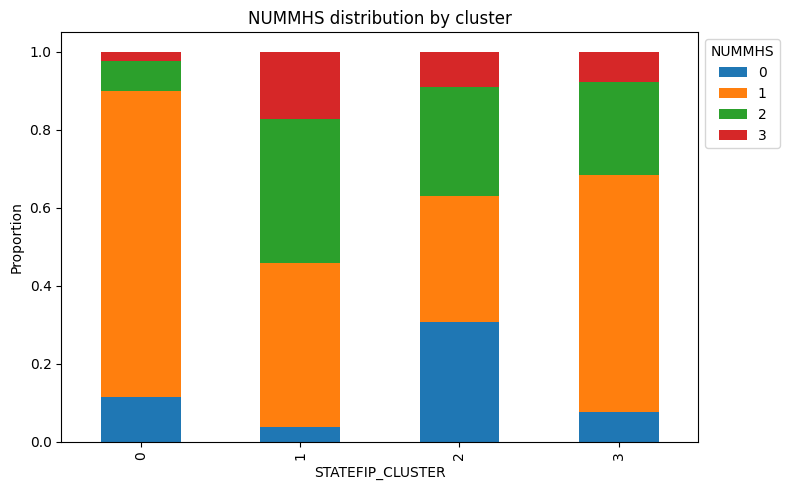

In [ ]:
# 각 클러스터 내 NUMMHS 분포 (도수와 비율)
dist_count = df.groupby(['STATEFIP_CLUSTER', 'NUMMHS']).size().unstack(fill_value=0)
dist_ratio = dist_count.div(dist_count.sum(axis=1), axis=0)



print("\n질환 개수 분포 (비율):")
display(dist_ratio)



import matplotlib.pyplot as plt

# 비율 그래프 (stacked bar)
ax = dist_ratio.plot(kind='bar', stacked=True, figsize=(8, 5))
ax.set_ylabel('Proportion')
ax.set_xlabel('STATEFIP_CLUSTER')
ax.set_title('NUMMHS distribution by cluster')
ax.legend(title='NUMMHS', bbox_to_anchor=(1, 1))  # 범례 바깥쪽
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# 1) 클러스터별 기초 통계 (NUMMHS를 숫자 변수로)
stats = (
    df.groupby("STATEFIP_CLUSTER")["NUMMHS"]
      .agg(count="size",
           mean="mean",
           std="std",
)
      .round(2)
)
# CV(변동계수) 추가 = 표준편차 / 평균
stats["cv"] = (stats["std"] / stats["mean"]).round(2)
display(stats)

# 2) 분포 모양이 균일한지?  → Shannon entropy
#    dist_ratio 는 이미 클러스터별 비율 DF
entropy_bits = dist_ratio.apply(lambda r: entropy(r + 1e-9, base=2), axis=1)
display(pd.DataFrame({"entropy_bits": entropy_bits.round(3)}))

from scipy.stats import chi2_contingency
import pandas as pd

# dist_count : (rows = STATEFIP_CLUSTER, cols = NUMMHS)
chi2, p, dof, expected = chi2_contingency(dist_count)

print(f"χ² = {chi2:,.1f}  |  dof = {dof}  |  p-value = {p:.3e}")


count  mean   std    cv
STATEFIP_CLUSTER                           
0                 1212510  1.01  0.53  0.52
1                 1535670  1.68  0.80  0.48
2                 1243455  1.15  0.96  0.83
3                 1325975  1.32  0.72  0.55

entropy_bits
STATEFIP_CLUSTER              
0                        1.039
1                        1.672
2                        1.877
3                        1.498

χ² = 1,154,023.3  |  dof = 9  |  p-value = 0.000e+00


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

for k in range(2, 9):
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(state_ratio.values)
    sil  = silhouette_score(state_ratio.values, labels)
    dbi  = davies_bouldin_score(state_ratio.values, labels)
    print(f"k={k}: silhouette={sil:.3f}  |  DB-index={dbi:.3f}")


k=2: silhouette=0.677  |  DB-index=0.524
k=3: silhouette=0.679  |  DB-index=0.421
k=4: silhouette=0.848  |  DB-index=0.236
k=5: silhouette=0.784  |  DB-index=0.399
k=6: silhouette=0.654  |  DB-index=0.626
k=7: silhouette=0.681  |  DB-index=0.643
k=8: silhouette=0.598  |  DB-index=0.558


- 목표: NUMMHS 다중 클래스 문제를 **단계별 분기 구조(3단계 이진 트리)**로 분해하여, 클래스 간 불균형을 완화하고 예측 성능을 높이기 위함
- 전체 구조:
  - **1단계:** class 0 vs (1, 2, 3) → class 0인지 아닌지 이진 분류
  - **2단계:** class 1 vs (2, 3) → class 0이 아니라고 예측된 샘플 대상
  - **3단계:** class 2 vs 3 → 최종적으로 남은 샘플 대상
- 데이터 불균형 처리:
  - 2단계, 3단계에서는 **`RandomUnderSampler`를 사용**해 클래스 비율을 균형 맞춤 (소수 클래스 기준)
  - 1단계는 `class_weight={0:5, 1:1}`로 0의 중요도를 강조
- 성능 분석:
  - 각 단계별 **예측 성능(classification report)과 주요 변수(feature importance)** 출력
  - 트리 구조 시각화 및 결정 규칙 텍스트로 **분기 구조의 해석 가능성 확보**
- 최종 통합 예측: 각 단계를 거쳐 나온 예측값을 통합해 전체 클래스 예측 생성 → 전체 데이터에 대해 평가 수행
- 주요 장점:
  - **클래스 간 불균형을 단계별로 다르게 다룰 수 있어 예측 편향 감소**
  - **단순 결정트리를 조합해도 계층적 설계로 복잡한 다중 분류 문제 해결 가능**



[1단계] 성능 평가
              precision    recall  f1-score   support

           0       0.43      0.54      0.48    681464
           1       0.93      0.90      0.91   4636146

    accuracy                           0.85   5317610
   macro avg       0.68      0.72      0.70   5317610
weighted avg       0.87      0.85      0.86   5317610

[1단계] Feature Importances:
SAP                 0.287795
STATEFIP            0.275293
STATEFIP_CLUSTER    0.199045
DIVISION            0.139144
SUB                 0.080875
AGE                 0.010647
RACE                0.002697
GENDER              0.002430
REGION              0.001030
DETNLF              0.001016
ETHNIC              0.000028
dtype: float64

[1단계] Tree Rules
|--- SAP <= -49.00
|   |--- STATEFIP_CLUSTER <= 1.50
|   |   |--- STATEFIP <= 19.00
|   |   |   |--- DIVISION <= 6.00
|   |   |   |   |--- STATEFIP <= 15.50
|   |   |   |   |   |--- AGE <= 0.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- AGE >  0.35
|   |   |   

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


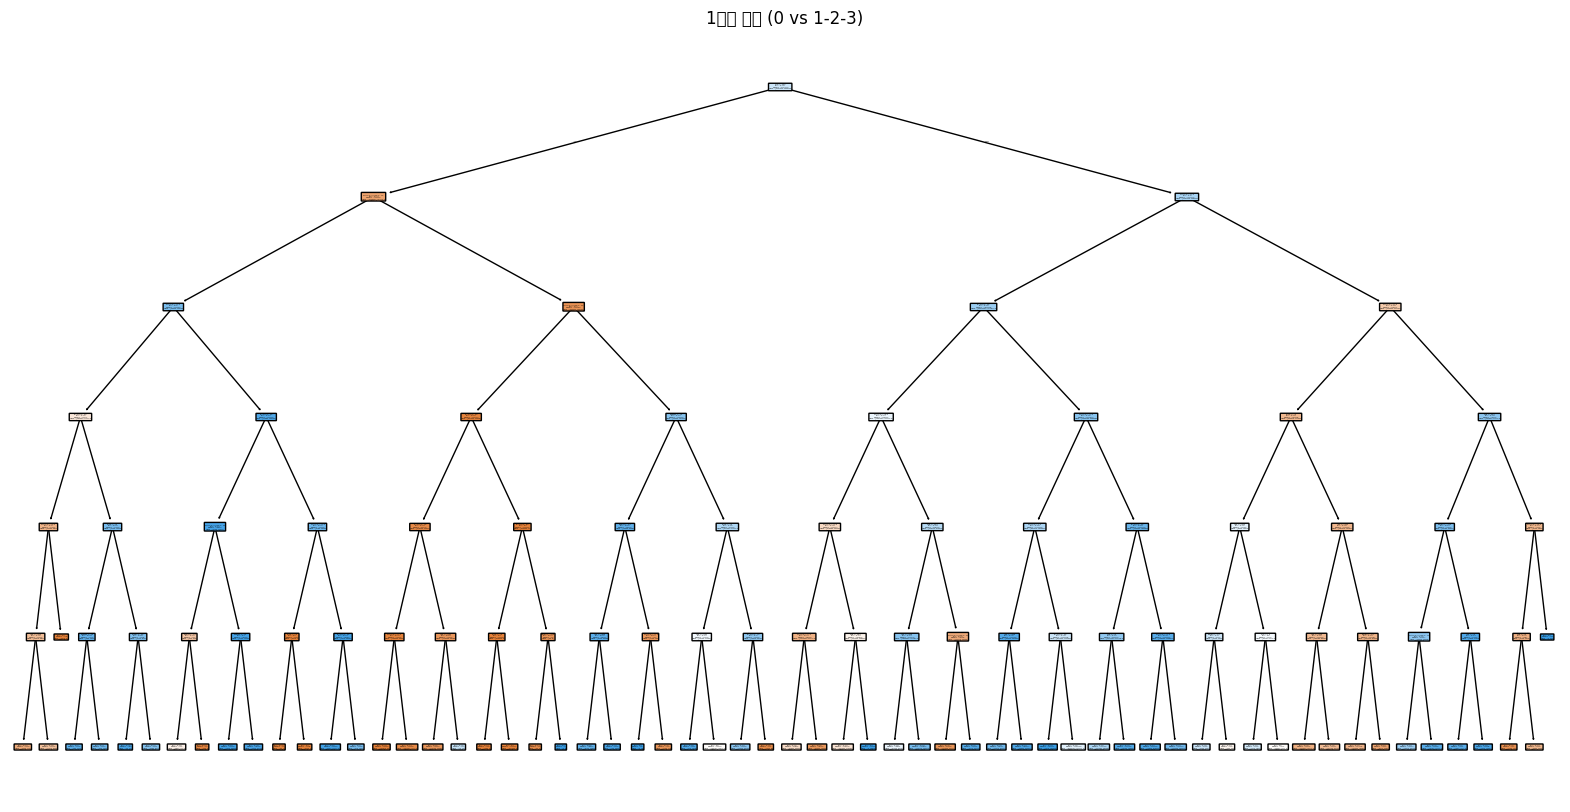

[2단계] 클래스 분포 (원본): Counter({1: 2549871, 0: 1926673})
[2단계] 클래스 분포 (리샘플링 후): Counter({0: 1926673, 1: 1926673})

[2단계] 성능 평가 (1 vs 2,3)
              precision    recall  f1-score   support

           0       0.60      0.66      0.63   1926673
           1       0.72      0.67      0.69   2549871

    accuracy                           0.67   4476544
   macro avg       0.66      0.67      0.66   4476544
weighted avg       0.67      0.67      0.67   4476544

[2단계] Feature Importances:
STATEFIP_CLUSTER    0.774190
SUB                 0.072833
STATEFIP            0.064959
AGE                 0.029072
DIVISION            0.022745
SAP                 0.020860
GENDER              0.007215
RACE                0.005051
DETNLF              0.001794
REGION              0.000729
ETHNIC              0.000551
dtype: float64

[2단계] Tree Rules
|--- STATEFIP_CLUSTER <= 0.50
|   |--- SAP <= 1.50
|   |   |--- STATEFIP <= 8.00
|   |   |   |--- DIVISION <= 8.00
|   |   |   |   |--- SAP <= -49.00
|   |   | 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


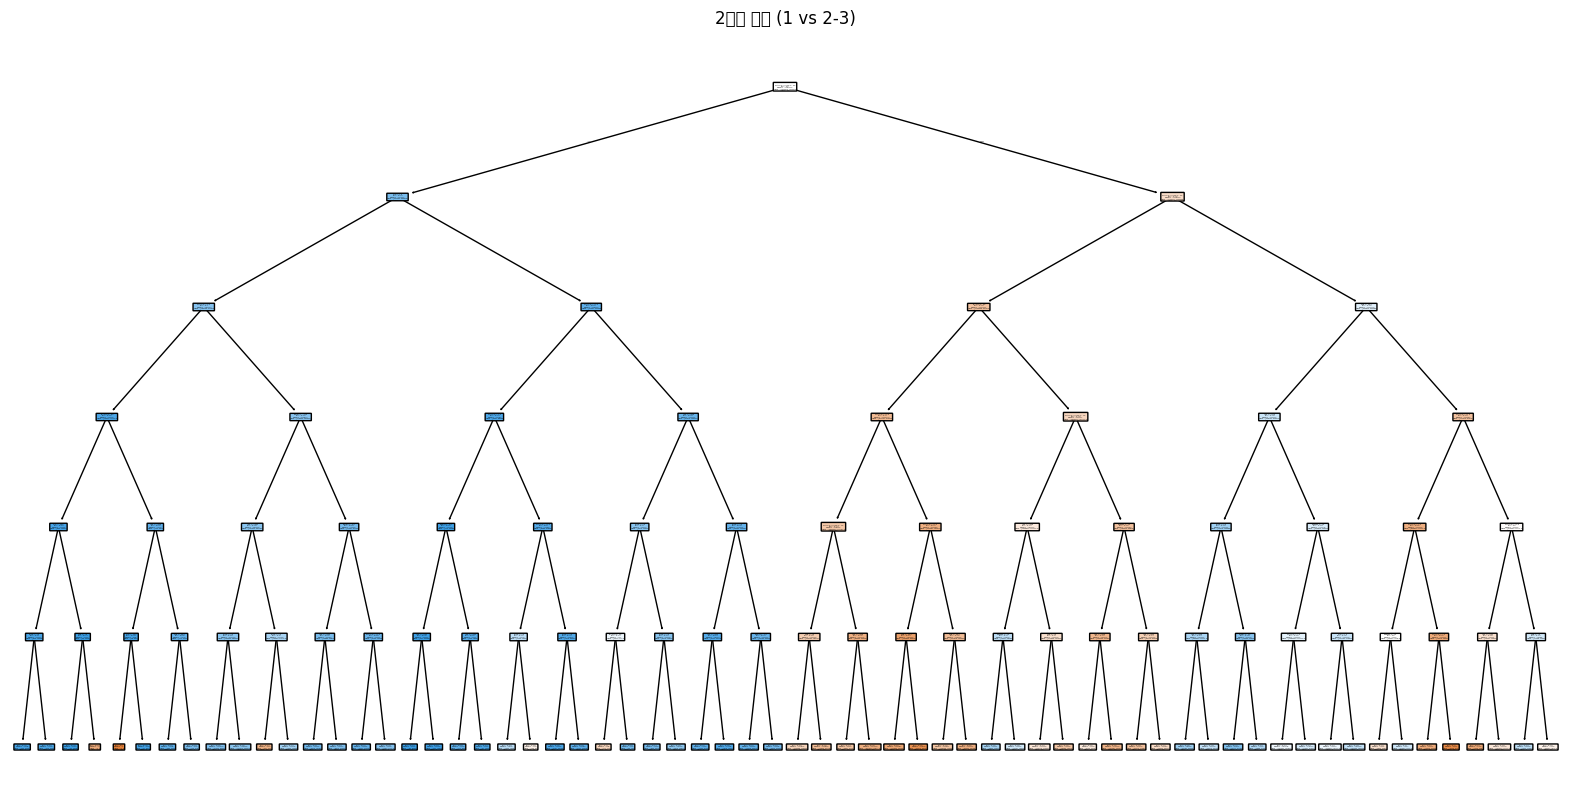

[3단계] 클래스 분포 (원본): Counter({1: 850629, 2: 802573, 3: 361715, 0: 115409})
[3단계] 클래스 분포 (리샘플링 후): Counter({1: 850629, 2: 361715, 3: 361715, 0: 115409})

[3단계] 성능 평가 (2 vs 3)
              precision    recall  f1-score   support

           0       0.14      0.83      0.24    115409
           1       0.51      0.40      0.45    850629
           2       0.49      0.15      0.23    802573
           3       0.24      0.36      0.29    361715

    accuracy                           0.32   2130326
   macro avg       0.34      0.43      0.30   2130326
weighted avg       0.43      0.32      0.33   2130326

[3단계] Feature Importances:
STATEFIP            0.422599
STATEFIP_CLUSTER    0.194280
SUB                 0.134556
DIVISION            0.084704
AGE                 0.049396
ETHNIC              0.037194
DETNLF              0.036271
GENDER              0.019082
SAP                 0.013928
RACE                0.004040
REGION              0.003950
dtype: float64

[3단계] Tree Rules
|--- SUB <= -4

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


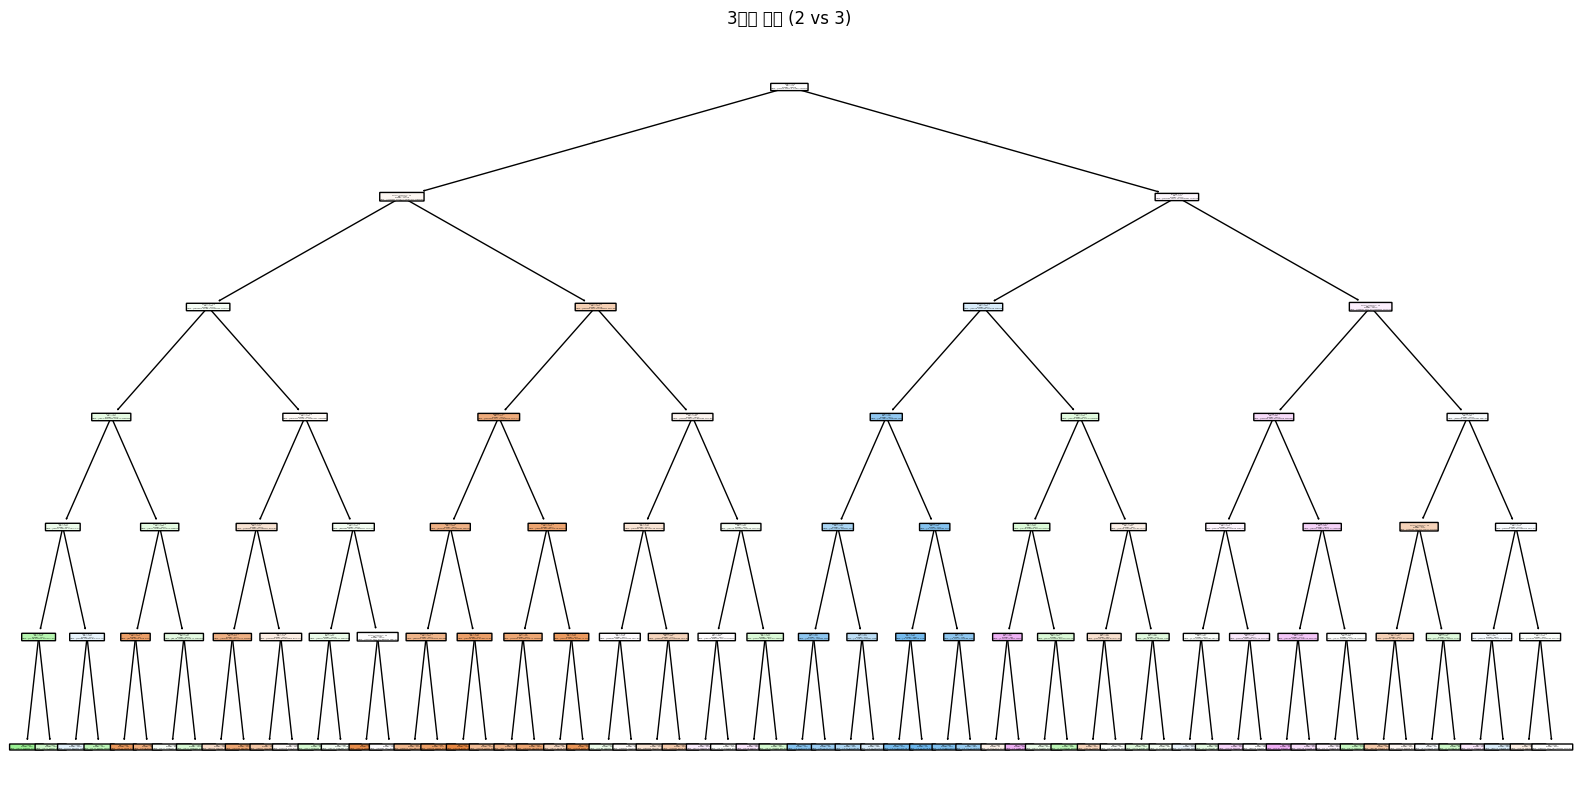


[최종 성능 평가]
              precision    recall  f1-score   support

           0       0.31      0.68      0.42    681464
           1       0.68      0.73      0.70   2806198
           2       0.49      0.09      0.15   1321089
           3       0.24      0.26      0.25    508859

    accuracy                           0.52   5317610
   macro avg       0.43      0.44      0.38   5317610
weighted avg       0.54      0.52      0.48   5317610



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import numpy as np

# 타겟 설정 및 제외 열
target_column = "NUMMHS"
y = df[target_column]
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE",
]
X = df.drop(columns=excluded_cols)

# 범주형 변수 인덱스 추출
categorical_cols = ["STATEFIP", "STATEFIP_CLUSTER", "DIVISION", "REGION", "SUB", "RACE", "GENDER", "ETHNIC", "DETNLF"]
categorical_idx = [X.columns.get_loc(col) for col in categorical_cols if col in X.columns]

# 1단계: class 0 vs (1,2,3)
y_step1 = (y != 0).astype(int)
tree1 = DecisionTreeClassifier(max_depth=6, class_weight={0: 5, 1: 1}, random_state=42)
tree1.fit(X, y_step1)
y_pred1 = tree1.predict(X)

print("\n[1단계] 성능 평가")
print(classification_report(y_step1, y_pred1))

importances1 = pd.Series(tree1.feature_importances_, index=X.columns)
print("[1단계] Feature Importances:")
print(importances1[importances1 > 0].sort_values(ascending=False))

print("\n[1단계] Tree Rules")
print(export_text(tree1, feature_names=list(X.columns)))

plt.figure(figsize=(20, 10))
plot_tree(tree1, feature_names=X.columns, class_names=["0", "1-2-3"], filled=True, rounded=True)
plt.title("1단계 트리 (0 vs 1-2-3)")
plt.show()

# 2단계: class 1 vs (2,3)
mask_rest = y_pred1 == 1
X_rest = X[mask_rest]
y_rest = y[mask_rest]
y_step2 = (y_rest == 1).astype(int)

print("[2단계] 클래스 분포 (원본):", Counter(y_step2))

count_0 = Counter(y_step2)[0]
count_1 = Counter(y_step2)[1]
desired_n = min(count_0, count_1)

under2 = RandomUnderSampler(sampling_strategy={0: desired_n, 1: desired_n}, random_state=42)
X_step2_res, y_step2_res = under2.fit_resample(X_rest, y_step2)

print("[2단계] 클래스 분포 (리샘플링 후):", Counter(y_step2_res))

tree2 = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)
tree2.fit(X_step2_res, y_step2_res)
y_pred2 = tree2.predict(X_rest)

print("\n[2단계] 성능 평가 (1 vs 2,3)")
print(classification_report(y_step2, y_pred2))

importances2 = pd.Series(tree2.feature_importances_, index=X.columns)
print("[2단계] Feature Importances:")
print(importances2[importances2 > 0].sort_values(ascending=False))

print("\n[2단계] Tree Rules")
print(export_text(tree2, feature_names=list(X.columns)))

plt.figure(figsize=(20, 10))
plot_tree(tree2, feature_names=X.columns, class_names=["2-3", "1"], filled=True, rounded=True)
plt.title("2단계 트리 (1 vs 2-3)")
plt.show()

# 3단계: class 2 vs 3
mask_23 = (y_pred2 == 0)
X_23 = X_rest[mask_23]
y_23 = y_rest[mask_23]

print("[3단계] 클래스 분포 (원본):", Counter(y_23))

count_2 = Counter(y_23)[2]
count_3 = Counter(y_23)[3]
desired_n = min(count_2, count_3)

under3 = RandomUnderSampler(sampling_strategy={2: desired_n, 3: desired_n}, random_state=42)
X_step3_res, y_step3_res = under3.fit_resample(X_23, y_23)

print("[3단계] 클래스 분포 (리샘플링 후):", Counter(y_step3_res))

tree3 = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)
tree3.fit(X_step3_res, y_step3_res)
y_pred3 = tree3.predict(X_23)

print("\n[3단계] 성능 평가 (2 vs 3)")
print(classification_report(y_23, y_pred3))

importances3 = pd.Series(tree3.feature_importances_, index=X.columns)
print("[3단계] Feature Importances:")
print(importances3[importances3 > 0].sort_values(ascending=False))

print("\n[3단계] Tree Rules")
print(export_text(tree3, feature_names=list(X.columns)))

plt.figure(figsize=(20, 10))
plot_tree(
    tree3,
    feature_names=X.columns,
    class_names=[str(cls) for cls in np.unique(y_step3_res)],
    filled=True,
    rounded=True
)
plt.title("3단계 트리 (2 vs 3)")
plt.show()

# 최종 통합 예측
y_final_pred = pd.Series(0, index=y.index)
y_final_pred[mask_rest] = 1
y_final_pred.loc[X_rest[mask_23].index] = y_pred3

print("\n[최종 성능 평가]")
print(classification_report(y, y_final_pred))


전체 흐름 진단
1단계: 0 vs (1, 2, 3)
정확도: 85%

요약: class 1 이상 여부를 매우 잘 구분함

주요 변수: SAP, STATEFIP, STATEFIP_CLUSTER 등이 유의미하게 작용

해석: 전체적으로 분기 성능이 양호하며 class 0의 독립성이 잘 드러남

2단계: 1 vs (2, 3)
정확도: 67%

요약: 비교적 안정적인 성능. precision과 recall의 균형도 나쁘지 않음

주요 변수: STATEFIP_CLUSTER 하나가 전체 변수 중요도의 약 77% 차지

해석: class 1과 그 외(class 2, 3)의 구분이 지리적 클러스터 기반으로 효과적으로 이루어짐

3단계: 2 vs 3
정확도: 32%

성능 저하:

class 2: precision 0.49, recall 0.15 (대부분 탐지 실패)

class 3: 혼동률 높고 예측력 떨어짐

주요 변수: STATEFIP, SUB, DIVISION, AGE 등

문제점:

주요 변수가 반복되며 정보 중복 발생

예측력이 뚜렷하게 낮은 신호

문제 원인 진단
클래스 간 분포 겹침
class 2와 class 3는 원래 분포가 비슷하여 결정경계 설정이 어렵고, 트리가 구분 기준을 효과적으로 학습하지 못함

단순한 모델 구조
DecisionTree(max_depth=6)는 복잡한 클래스 간 경계를 포착하기 어려움.
계층 구조 특성상 앞 단계의 분류 오류가 누적되어 최종 예측 정확도에 부정적 영향을 미침

정보 손실 및 부족
class 2는 원래도 소수 클래스인데 언더샘플링만 적용해 학습 데이터가 더욱 축소됨
→ 분포를 대표하지 못하는 학습셋으로 인해 모델이 의미 있는 패턴을 학습하기 어려움

- 목표: NUMMHS 4개 클래스를 **3그룹(GROUP3: 0 / 1 / 2-3 묶음)**으로 단순화하고, 이를 **2단계 결정트리 구조**로 예측하여 다중 분류 문제를 간소화
- 그룹 구성:
  - class 0 → GROUP3 = 0
  - class 1 → GROUP3 = 1
  - class 2 or 3 → GROUP3 = 2
- 예측 구조:
  - **1단계**: class 0 vs (class 1 or 2-3 묶음) → 이진 분류
  - **2단계**: 위에서 0이 아닌 샘플 중 class 1 vs class 2-3 → 다시 이진 분류
- 클래스 불균형 처리: 각 단계에서 `RandomUnderSampler`로 리샘플링하여 **균형 학습**
- 평가 방식:
  - 각 단계별 `classification_report`와 `feature_importances_`를 통해 **성능과 중요 변수** 확인
  - `export_text` 및 `plot_tree`로 **트리 구조 및 규칙 해석 가능**
  - 최종 예측 결과(`y_final`)를 GROUP3 전체에 대해 평가하여 **단순화된 다중 클래스 분류 성능** 확인
- 주요 장점:
  - 예측 난이도 높은 class 2/3을 통합함으로써 **예측 구조 단순화**
  - 계층적 분류를 통해 **각 클래스에 특화된 결정기 작동**
  - 직관적인 분기 설계로 **모델 해석력 향상**


[1단계] 성능 평가 (0 vs 1-2)
              precision    recall  f1-score   support

           0       0.29      0.79      0.42    681464
           1       0.96      0.71      0.82   4636146

    accuracy                           0.72   5317610
   macro avg       0.62      0.75      0.62   5317610
weighted avg       0.87      0.72      0.77   5317610


[1단계] Feature Importances:
STATEFIP_CLUSTER    0.359016
SAP                 0.303002
DIVISION            0.220790
STATEFIP            0.058279
SUB                 0.034189
AGE                 0.013457
DETNLF              0.007331
GENDER              0.002815
RACE                0.001017
ETHNIC              0.000060
REGION              0.000044
dtype: float64

[1단계] Tree Rules
|--- SAP <= -49.00
|   |--- STATEFIP_CLUSTER <= 1.50
|   |   |--- STATEFIP <= 19.00
|   |   |   |--- DIVISION <= 6.00
|   |   |   |   |--- STATEFIP <= 15.50
|   |   |   |   |   |--- AGE <= 0.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- AGE >  0.35
|

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


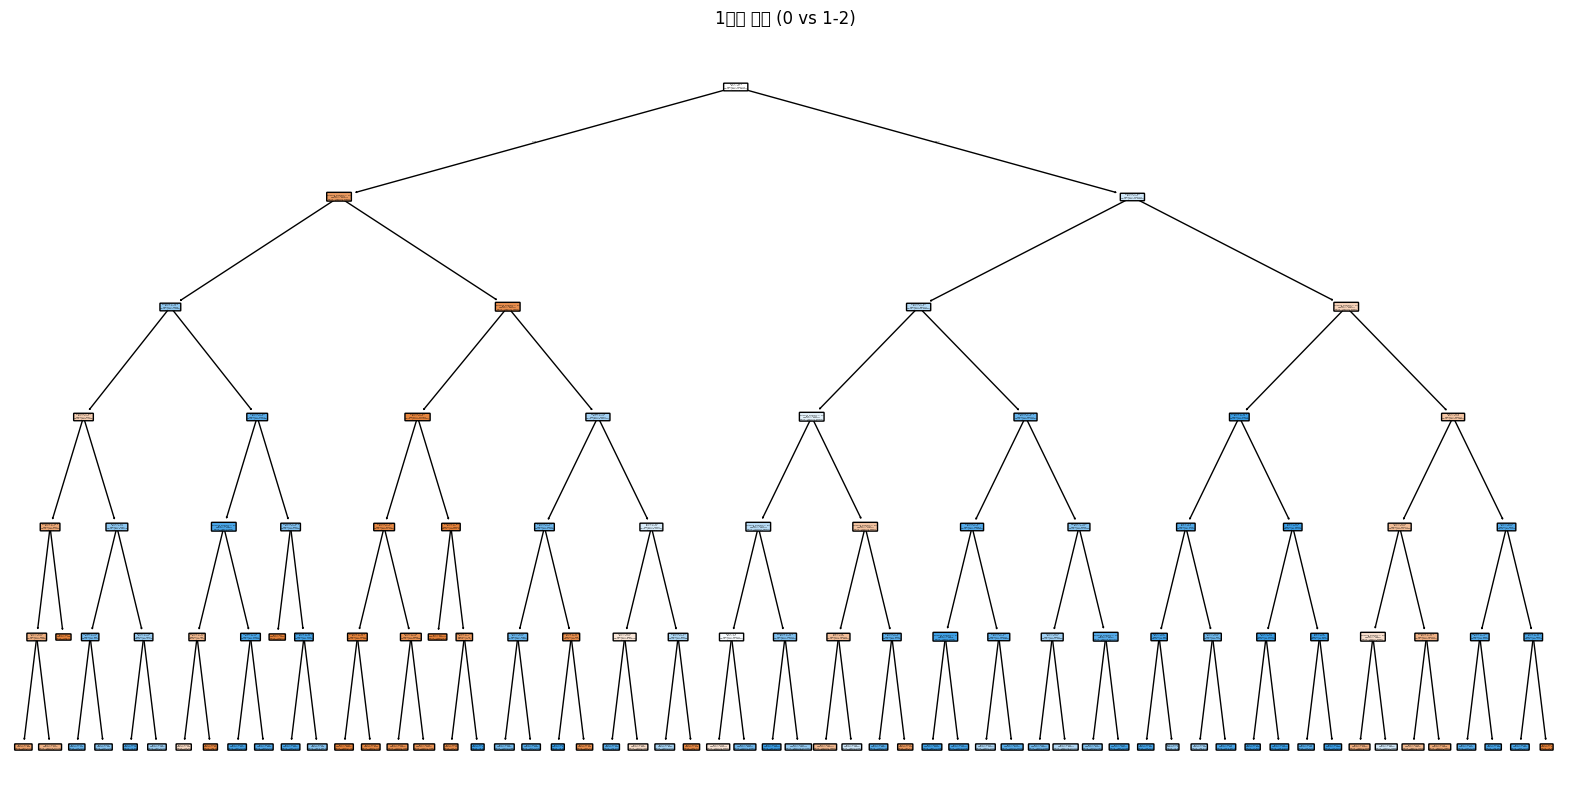

[2단계] 성능 평가 (1 vs 2)
              precision    recall  f1-score   support

           0       0.72      0.56      0.63   1846395
           1       0.60      0.75      0.67   1597520

    accuracy                           0.65   3443915
   macro avg       0.66      0.66      0.65   3443915
weighted avg       0.66      0.65      0.65   3443915


[2단계] Feature Importances:
STATEFIP_CLUSTER    0.679379
SUB                 0.121930
STATEFIP            0.103594
DIVISION            0.061056
AGE                 0.023643
SAP                 0.003948
RACE                0.003863
REGION              0.000953
ETHNIC              0.000671
DETNLF              0.000485
GENDER              0.000480
dtype: float64

[2단계] Tree Rules
|--- STATEFIP_CLUSTER <= 0.50
|   |--- STATEFIP <= 32.00
|   |   |--- DIVISION <= 6.00
|   |   |   |--- STATEFIP <= 18.00
|   |   |   |   |--- AGE <= 0.81
|   |   |   |   |   |--- AGE <= 0.04
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- AGE >  0.04
|   |

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


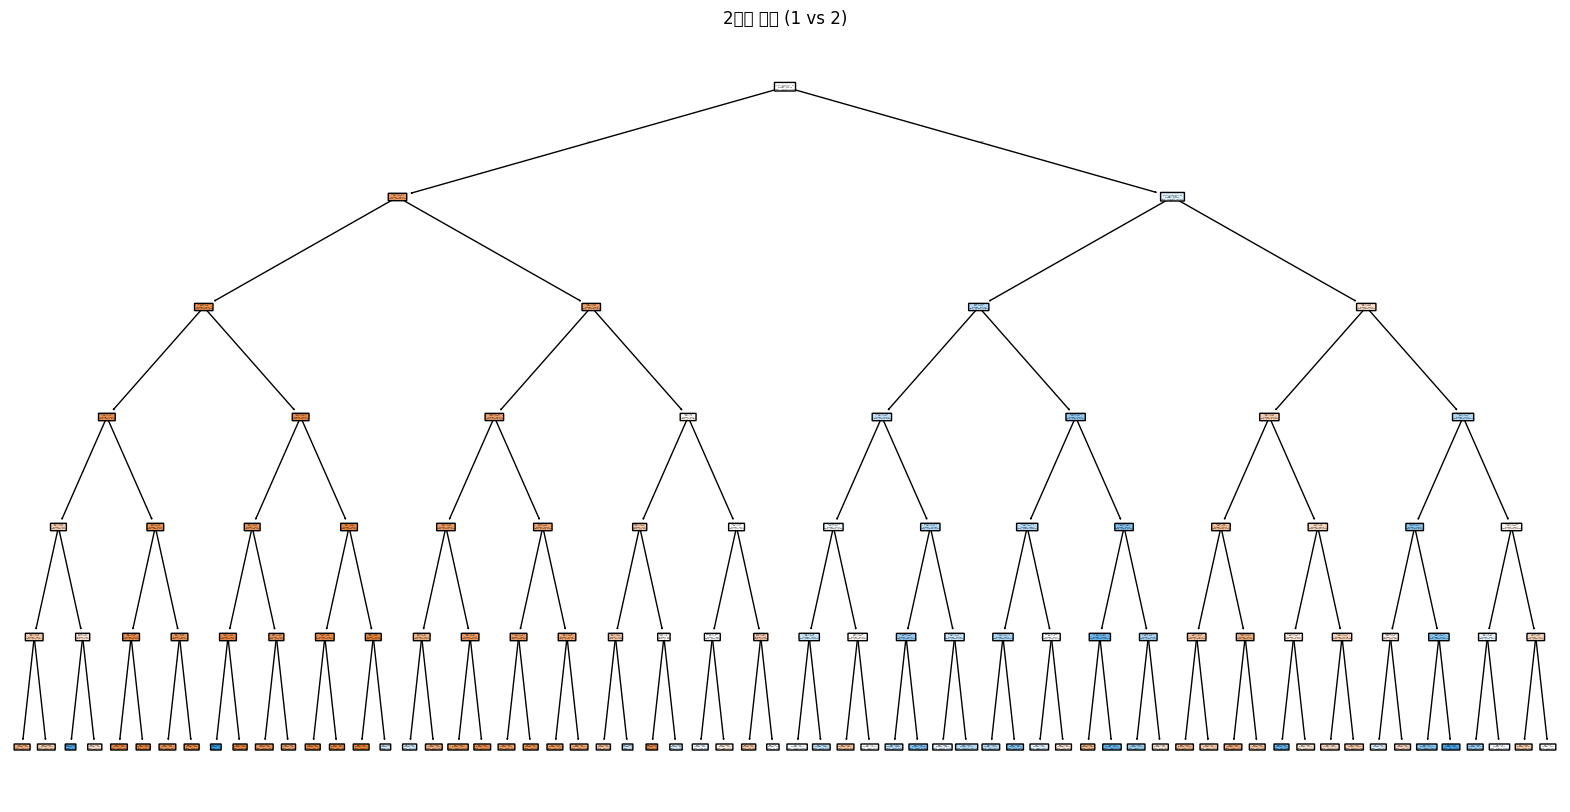


[최종 성능 평가]
              precision    recall  f1-score   support

           0       0.29      0.79      0.42    681464
           1       0.72      0.37      0.49   2806198
           2       0.55      0.61      0.58   1829948

    accuracy                           0.51   5317610
   macro avg       0.52      0.59      0.50   5317610
weighted avg       0.61      0.51      0.51   5317610



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# GROUP3 정의: 0 = class 0, 1 = class 1, 2 = class 2 or 3
df["GROUP3"] = df["NUMMHS"].map(lambda x: 0 if x == 0 else (1 if x == 1 else 2))
df_grouped = df.copy()
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE",
]

# 예측에 사용할 피처 (GROUP3 포함하지 않도록)
X = df_grouped.drop(columns=excluded_cols + ["GROUP3"])
y_group = df_grouped["GROUP3"]

# 1단계: class 0 vs (1,2)
y_step1 = (y_group != 0).astype(int)
under1 = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_step1_res, y_step1_res = under1.fit_resample(X, y_step1)

tree1 = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)
tree1.fit(X_step1_res, y_step1_res)
y_pred1 = tree1.predict(X)

print("[1단계] 성능 평가 (0 vs 1-2)")
print(classification_report(y_step1, y_pred1))

# Feature Importance (1단계)
importances1 = pd.Series(tree1.feature_importances_, index=X.columns)
print("\n[1단계] Feature Importances:")
print(importances1[importances1 > 0].sort_values(ascending=False))

# Tree Rules (1단계)
print("\n[1단계] Tree Rules")
print(export_text(tree1, feature_names=list(X.columns)))

plt.figure(figsize=(20, 10))
plot_tree(tree1, feature_names=X.columns, class_names=["0", "1-2"], filled=True, rounded=True)
plt.title("1단계 트리 (0 vs 1-2)")
plt.show()

# 2단계: class 1 vs 2
mask_12 = (y_pred1 == 1)
X_12 = X[mask_12]
y_12 = df_grouped.loc[mask_12, "GROUP3"].map(lambda x: 0 if x == 1 else 1)  # 1 vs 2 → 0 vs 1

under2 = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_step2_res, y_step2_res = under2.fit_resample(X_12, y_12)

tree2 = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)
tree2.fit(X_step2_res, y_step2_res)
y_pred2 = tree2.predict(X_12)

print("[2단계] 성능 평가 (1 vs 2)")
print(classification_report(y_12, y_pred2))

# Feature Importance (2단계)
importances2 = pd.Series(tree2.feature_importances_, index=X.columns)
print("\n[2단계] Feature Importances:")
print(importances2[importances2 > 0].sort_values(ascending=False))

# Tree Rules (2단계)
print("\n[2단계] Tree Rules")
print(export_text(tree2, feature_names=list(X.columns)))

plt.figure(figsize=(20, 10))
plot_tree(tree2, feature_names=X.columns, class_names=["1", "2"], filled=True, rounded=True)
plt.title("2단계 트리 (1 vs 2)")
plt.show()

# 최종 예측 조립
y_final = pd.Series(0, index=df_grouped.index)     # 기본값: class 0
y_final[mask_12] = y_pred2 + 1                     # 1 or 2

# 최종 성능 평가
print("\n[최종 성능 평가]")
print(classification_report(y_group, y_final))


목표:
정신질환 진단 횟수(NUMMHS)를 4개 클래스(0, 1, 2, 3)로 분류하되, 단일 결정트리 기반으로
SMOTE를 활용해 클래스 불균형을 완화하고, 클래스별 예측 목적에 맞게 threshold를 개별적으로 조정하여 예측 성능 향상

방법:
병원 변수, 진단 플래그, 개인 식별자 등 예측에 직접적 영향을 줄 수 있는 변수를 제거한 후,
SMOTE로 클래스 균형 조정 → 단일 결정트리 학습 (max_depth=None) →
검증 세트 확률 예측 결과를 활용해 클래스별 최적 threshold 탐색 및 적용

성능 향상:

클래스별 목적 지표(precision, recall, f1)에 따라 threshold를 개별 조정

예측 확률에서 threshold를 뺀 값 중 가장 큰 클래스 선택 → 정밀도·재현율을 클래스 특성에 따라 유연하게 조절

평가:

전체 데이터셋에 대해 threshold 적용 예측 결과로 정밀도·재현율·F1-score 중심 분류 리포트 출력

단일 결정트리 구조로 해석 가능성과 적용 용이성 확보

결과 시각화:

plot_tree로 깊이 제한 없이 학습한 전체 결정트리 시각화 (max_depth=6까지만 시각화)

export_text로 전체 규칙 출력 가능

feature_importances_ 기반 상위 20개 변수 중요도 정량 확인

주요 차이점:
앙상블 없이 단일 결정트리로 구성하되,
**클래스 간 정책적 판단(정밀도 vs 재현율)**을 반영한 threshold 조정으로 예측 전략의 현실 적용성 강화
→ 단순한 모델 구조와 클래스별 민감도 조정 전략의 결합을 통해 해석력과 실효성을 동시에 확보

원본 클래스 분포 : Counter({1: 2806198, 2: 1321089, 0: 681464, 3: 508859})
SMOTE 후 클래스 분포 : Counter({2: 2806198, 1: 2806198, 3: 2806198, 0: 2806198})

트리 규칙 미리보기 (상위 20줄)
|--- SAP <= -95.00
|   |--- STATEFIP <= 47.50
|   |   |--- REGION <= 1.50
|   |   |   |--- STATEFIP <= 35.50
|   |   |   |   |--- STATEFIP <= 32.50
|   |   |   |   |   |--- DETNLF <= 1.50
|   |   |   |   |   |   |--- AGE <= 0.52
|   |   |   |   |   |   |   |--- DIVISION <= 1.50
|   |   |   |   |   |   |   |   |--- ETHNIC <= 2.50
|   |   |   |   |   |   |   |   |   |--- AGE <= 0.08
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- AGE >  0.08
|   |   |   |   |   |   |   |   |   |   |--- RACE <= 5.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- RACE >  5.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- ETHNIC >  2.50
|   |   |   |   |   |   |   |   |   |--- A

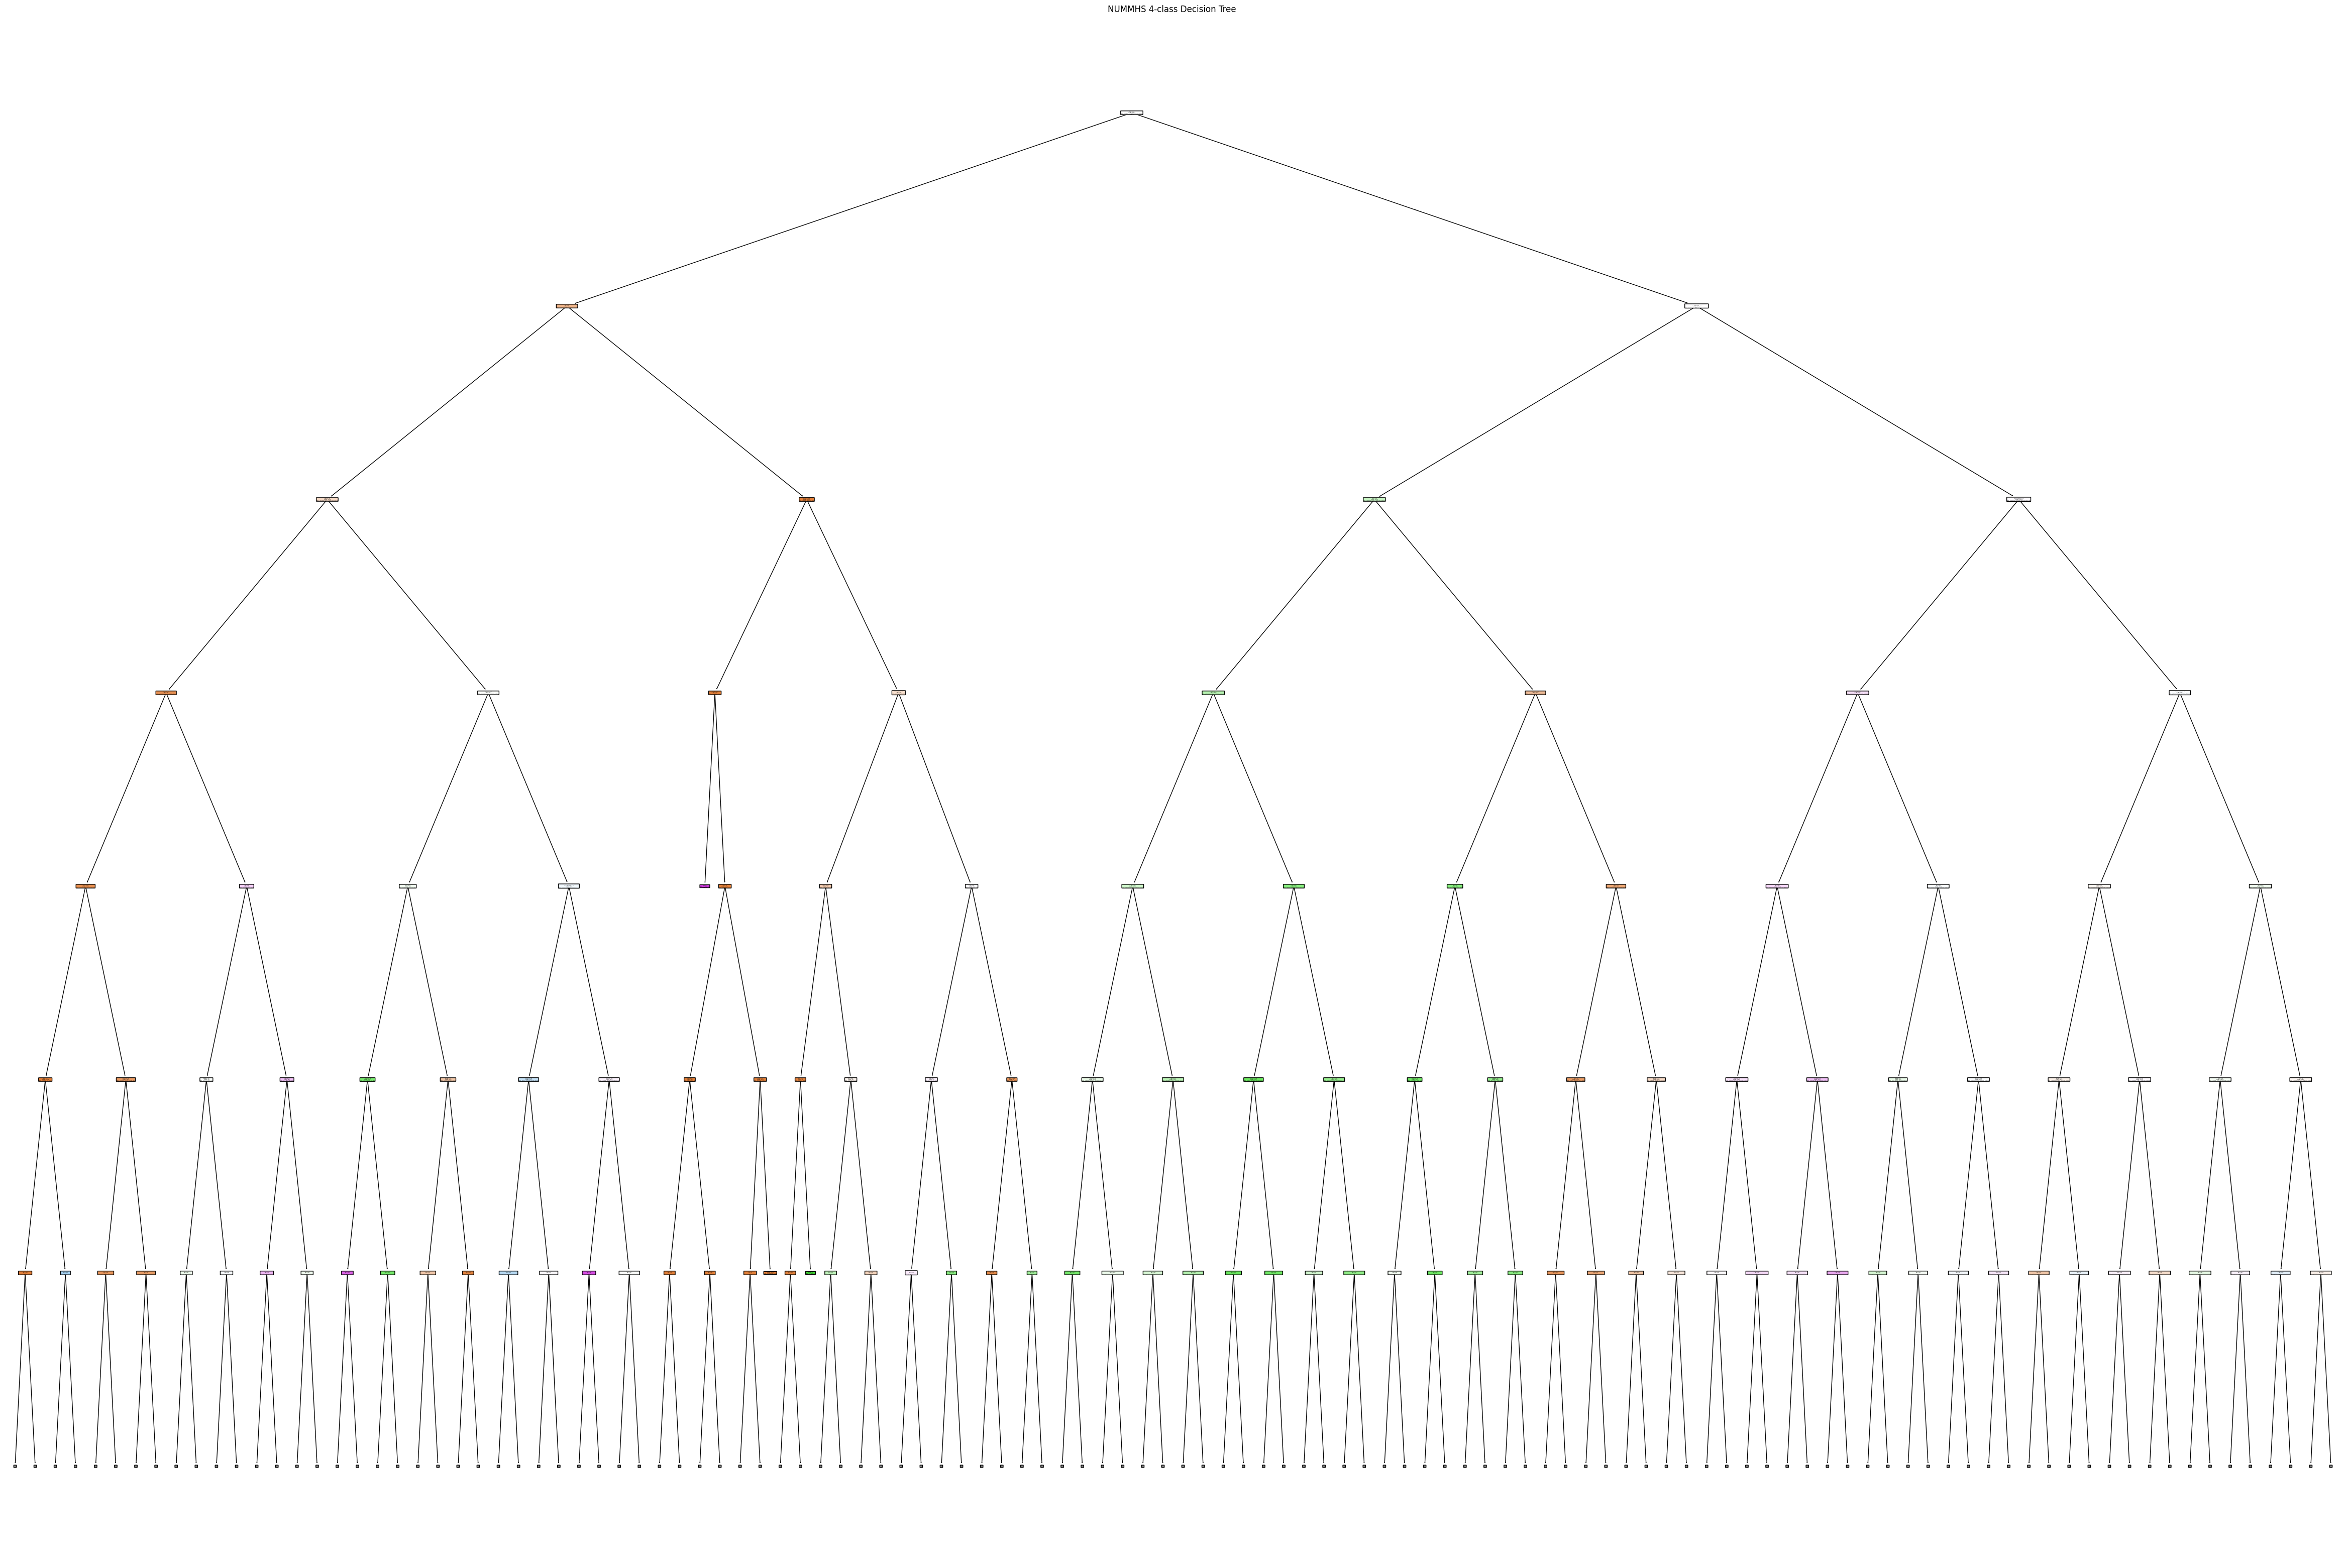

In [3]:
"""
NUMMHS 4-class 분류 (0,1,2,3) – 단일 단계 트리 + SMOTE + 클래스별 threshold 튜닝
-------------------------------------------------------------------------------

"""

# --------------------------------------------------------------------------- #
# 0. 라이브러리
# --------------------------------------------------------------------------- #
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
)

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------- #
# 1. 데이터 / 피처 준비
# --------------------------------------------------------------------------- #
# 데이터 불러오기
#df = pd.read_csv("단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv")

target_column = "NUMMHS"
y = df[target_column]
excluded_cols = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE",
]
# df 와 excluded_cols 는 이미 존재한다고 가정
X = df.drop(columns=excluded_cols)

print("원본 클래스 분포 :", Counter(y))

# --------------------------------------------------------------------------- #
# 2. SMOTE 로 클래스 균형 맞추기
# --------------------------------------------------------------------------- #
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("SMOTE 후 클래스 분포 :", Counter(y_resampled))

# --------------------------------------------------------------------------- #
# 3. 학습 / 검증 분리 (threshold 튜닝용)
# --------------------------------------------------------------------------- #
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.20,
    stratify=y_resampled,
    random_state=42,
)

# --------------------------------------------------------------------------- #
# 4. 결정트리 학습 (깊이 제한 X → max_depth=None)
#    - 필요 시 min_samples_leaf 등으로 과적합 완화
# --------------------------------------------------------------------------- #
tree = DecisionTreeClassifier(
    max_depth=None,
    class_weight="balanced",     # SMOTE 후에도 약간의 불균형 대비
    random_state=42,
)
tree.fit(X_train, y_train)

print("\n트리 규칙 미리보기 (상위 20줄)")
print("\n".join(export_text(tree, feature_names=list(X.columns)).splitlines()[:20]))

# --------------------------------------------------------------------------- #
# 5. 클래스별 Threshold 튜닝
# --------------------------------------------------------------------------- #
# 5-1. 어떤 지표를 중시할지 클래스마다 지정
#      (예시는 진단 1 → 재현율, 나머지 → F1)
# 1) 클래스별 평가 지표 재설정
metric_per_class = {
    0: "precision",   # 불필요 개입 최소화
    1: "f1",          # 균형
    2: "recall",      # 놓치면 안 됨
    3: "recall",      # 최우선 탐지
}


# 5-2. 지표 계산 함수 매핑
metric_fn = {
    "precision": precision_score,
    "recall": recall_score,
    "f1": f1_score,
}

# 5-3. threshold 검색
def tune_thresholds(y_true, proba, metric_map, search_grid=None):
    """
    y_true  : (n,) 실제 레이블
    proba   : (n, n_class) 각 클래스 확률
    metric_map : {class_idx: "precision"|"recall"|"f1"}
    search_grid : 탐색할 threshold 리스트 (None → np.linspace 0.05~0.95)
    반환      : {class_idx: best_threshold}
    """
    if search_grid is None:
        search_grid = np.linspace(0.05, 0.95, 19)

    thresholds = {}

    n_class = proba.shape[1]
    for cls in range(n_class):
        best_t, best_score = 0.5, -1  # 기본 0.5
        metric_name = metric_map.get(cls, "f1")
        scorer = metric_fn[metric_name]

        # 이진화용 타겟
        y_bin = (y_true == cls).astype(int)
        for t in search_grid:
            y_pred_bin = (proba[:, cls] >= t).astype(int)
            score = scorer(y_bin, y_pred_bin, zero_division=0)
            if score > best_score:
                best_t, best_score = t, score
        thresholds[cls] = best_t

        print(
            f"class {cls}: 선택 지표 = {metric_name:<8}  "
            f"→ best_threshold = {best_t:.2f}, best_{metric_name} = {best_score:.3f}"
        )
    return thresholds


# 검증 세트 예측 확률
proba_val = tree.predict_proba(X_val)
best_thresholds = tune_thresholds(y_val, proba_val, metric_per_class)

# --------------------------------------------------------------------------- #
# 6. Threshold 기반 최종 예측 함수
# --------------------------------------------------------------------------- #
def predict_with_thresholds(proba, thresholds):
    """
    각 클래스 threshold 를 반영해 예측.
    방법: (proba - threshold) 값이 가장 큰 클래스를 선택
    """
    thr_array = np.array([thresholds[c] for c in sorted(thresholds)])
    adjusted = proba - thr_array  # (n, n_class)
    preds = np.argmax(adjusted, axis=1)
    return preds


# --------------------------------------------------------------------------- #
# 7. 전체 데이터에 대한 최종 평가
# --------------------------------------------------------------------------- #
proba_all = tree.predict_proba(X)
y_pred_final = predict_with_thresholds(proba_all, best_thresholds)

print("\n[최종 성능 평가 – threshold 적용]")
print(classification_report(y, y_pred_final, digits=3))

# --------------------------------------------------------------------------- #
# 8. 변수 중요도 살펴보기 (상위 20개)
# --------------------------------------------------------------------------- #
importances = (
    pd.Series(tree.feature_importances_, index=X.columns)
    .sort_values(ascending=False)
    .head(20)
)
print("\n상위 20개 Feature Importances")
print(importances)

# --------------------------------------------------------------------------- #
# 9. 트리 전체 시각화 + 규칙 전체 출력
#    (깊이 제한 없이 — 그림이 매우 커질 수 있음에 유의)
# --------------------------------------------------------------------------- #

# 규칙 전체 출력 --------------------------------------------------------- #
print("\n[전체 트리 규칙]")
print(export_text(tree, feature_names=list(X.columns)))

#  트리 시각화 ------------------------------------------------------------ #
#   - 깊이 제한을 없애서(max_depth=None) 모든 노드를 그림
#   - 노드 수가 많을 때는 해상도를 충분히 키워야 함
plt.figure(figsize=(60, 40))        # 필요하면 더 키우세요
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    max_depth=6,
)
plt.title("NUMMHS 4-class Decision Tree ")
plt.show()


목표:
STATEFIP_CLUSTER 기준으로 데이터를 나눈 뒤, 클러스터별로 별도 결정트리 학습
각 군집 내에서 NUMMHS 4클래스를 예측하고, 클래스별 평가 지표에 따른 threshold 튜닝 적용

방법:
클러스터별로 병원/진단/지역 변수 제거 후
→ SMOTE로 클래스 균형 보정
→ 단일 결정트리 학습 (max_depth=None)
→ 검증 세트 기반 클래스별 threshold 최적화(precision, recall, f1)
→ 원본 데이터에 대해 최종 예측 및 평가

성능 향상:

SMOTE로 데이터 불균형 완화

클래스별 목적(metric) 기반 threshold 조정으로 정밀도·재현율 맞춤 제어

단일 트리 기반 구조로 군집별 해석력 확보

평가:

각 클러스터에서 threshold 적용 후 classification_report로 성능 확인

주요 피처 중요도 상위 10개 출력

결과 시각화:

plot_tree로 클러스터별 결정트리 시각화 (max_depth≤4)

export_text로 트리 규칙 일부 미리보기 제공

주요 차이점:
지역 정보를 단순 제외하지 않고 클러스터링을 통해 군집 간 구조를 유지한 채,
각 클러스터 특성에 맞는 분리된 예측 모델과 지표 기반 threshold 전략을 도입
→ 해석 가능하고 지역 특화된 정책적 인사이트 도출 가능성 확대


==========  CLUSTER 0  ==========
원본 분포: Counter({1: 952792, 0: 139363, 2: 93042, 3: 27313})
SMOTE 후: Counter({1: 952792, 3: 952792, 2: 952792, 0: 952792})

규칙 미리보기
|--- SUB <= -49.00
|   |--- SAP <= 1.50
|   |   |--- SAP <= -98.50
|   |   |   |--- RACE <= 4.50
|   |   |   |   |--- RACE <= 3.50
|   |   |   |   |   |--- AGE <= 0.77
|   |   |   |   |   |   |--- RACE <= 2.50
|   |   |   |   |   |   |   |--- AGE <= 0.08
|   |   |   |   |   |   |   |   |--- AGE <= 0.00
|   |   |   |   |   |   |   |   |   |--- GENDER <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- GENDER >  0.50
|   |   |   |   |   |   |   |   |   |   |--- RACE <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |   |--- RACE >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- AGE >  0.00
|   |   |   |   |   |   |   |   |   |--- AGE <= 0.02
|   |   |   |   |   |   |   | 

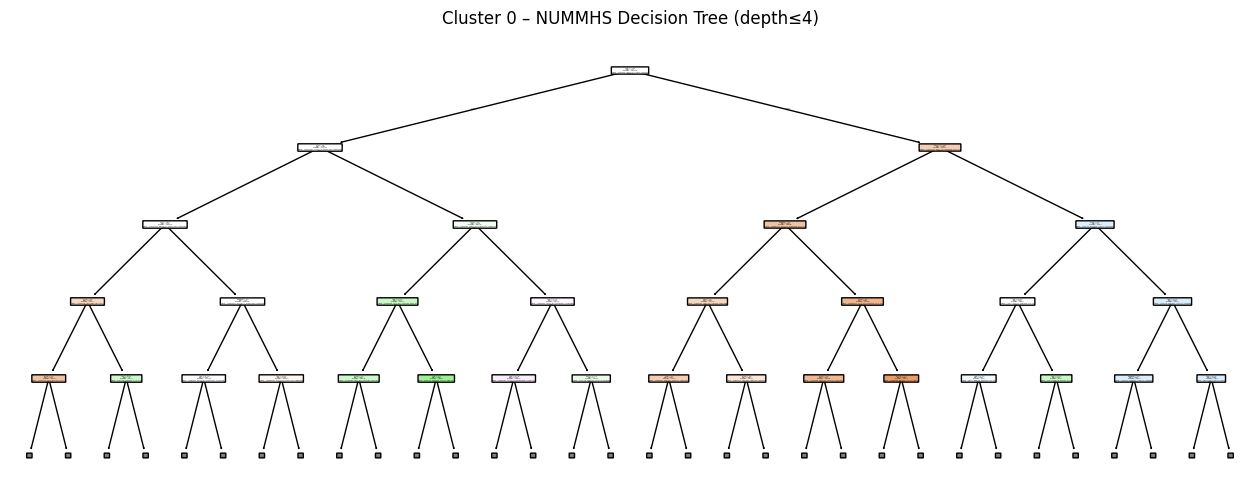


==========  CLUSTER 1  ==========
원본 분포: Counter({1: 646408, 2: 565536, 3: 265910, 0: 57816})
SMOTE 후: Counter({1: 646408, 2: 646408, 3: 646408, 0: 646408})

규칙 미리보기
|--- SUB <= 2.50
|   |--- ETHNIC <= 3.50
|   |   |--- AGE <= 0.23
|   |   |   |--- AGE <= 0.08
|   |   |   |   |--- SAP <= -49.00
|   |   |   |   |   |--- AGE <= 0.00
|   |   |   |   |   |   |--- GENDER <= 0.50
|   |   |   |   |   |   |   |--- ETHNIC <= 2.50
|   |   |   |   |   |   |   |   |--- ETHNIC <= 1.50
|   |   |   |   |   |   |   |   |   |--- RACE <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- RACE <= 4.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- RACE >  4.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- RACE >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- ETHNIC >  1.50
|   |   |   |   |   |   |   |   |   |--- RACE <= 5.50
|   |   |   |   |   | 

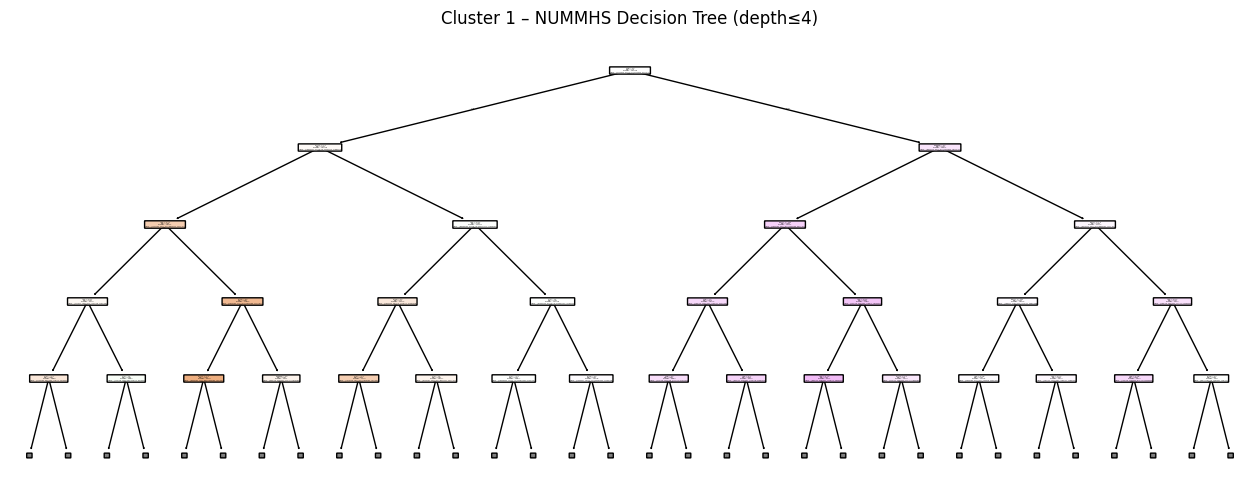


==========  CLUSTER 2  ==========
원본 분포: Counter({1: 399245, 0: 383490, 2: 348754, 3: 111966})
SMOTE 후: Counter({1: 399245, 0: 399245, 2: 399245, 3: 399245})

규칙 미리보기
|--- SAP <= -49.00
|   |--- AGE <= 0.23
|   |   |--- RACE <= 5.50
|   |   |   |--- RACE <= 3.50
|   |   |   |   |--- ETHNIC <= 3.50
|   |   |   |   |   |--- RACE <= 1.50
|   |   |   |   |   |   |--- DETNLF <= -48.50
|   |   |   |   |   |   |   |--- GENDER <= 0.50
|   |   |   |   |   |   |   |   |--- AGE <= 0.12
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- AGE >  0.12
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- GENDER >  0.50
|   |   |   |   |   |   |   |   |--- AGE <= 0.12
|   |   |   |   |   |   |   |   |   |--- AGE <= 0.04
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- AGE >  0.04
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- AGE >  0.12
|   |   | 

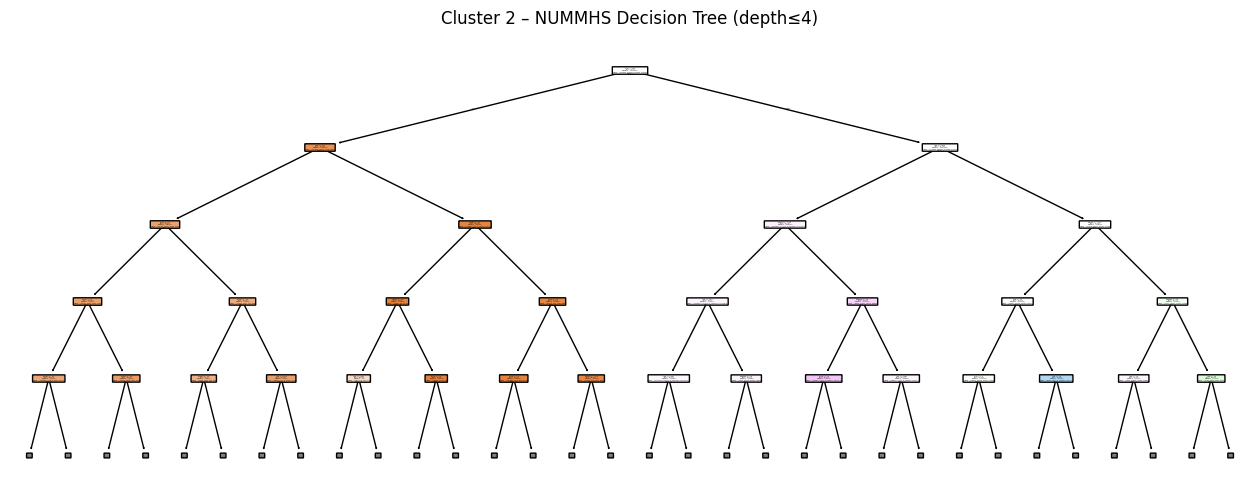


==========  CLUSTER 3  ==========
원본 분포: Counter({1: 807753, 2: 313757, 3: 103670, 0: 100795})
SMOTE 후: Counter({2: 807753, 1: 807753, 3: 807753, 0: 807753})

규칙 미리보기
|--- SUB <= -49.00
|   |--- RACE <= 5.50
|   |   |--- RACE <= 4.50
|   |   |   |--- ETHNIC <= 3.50
|   |   |   |   |--- AGE <= 0.07
|   |   |   |   |   |--- RACE <= 2.50
|   |   |   |   |   |   |--- GENDER <= 0.50
|   |   |   |   |   |   |   |--- SAP <= -49.00
|   |   |   |   |   |   |   |   |--- AGE <= 0.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- AGE >  0.00
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- SAP >  -49.00
|   |   |   |   |   |   |   |   |--- ETHNIC <= 2.50
|   |   |   |   |   |   |   |   |   |--- AGE <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- SAP <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- SAP >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- 

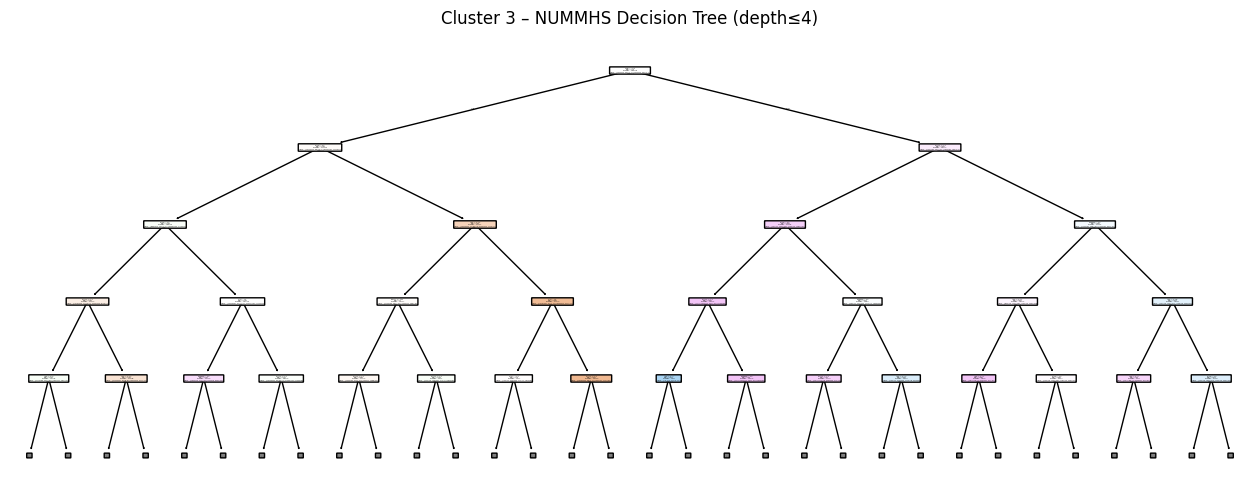

In [4]:
# --------------------------------------------------------------------------- #
# 필수 라이브러리
# --------------------------------------------------------------------------- #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# scikit-learn
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
)

# imbalanced-learn
from imblearn.over_sampling import SMOTE


# --------------------------------------------------------------------------- #
# 0. 공통 세팅 (클러스터 컬럼 이름·제외 피처·평가지표 등)
# --------------------------------------------------------------------------- #
CLUSTER_COL     = "STATEFIP_CLUSTER"      # 이미 df에 붙어 있음
TARGET_COL      = "NUMMHS"
EXCLUDED_COLS = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE","STATEFIP","REGION","DIVISION"
]
METRIC_PER_CLASS = {
    0: "precision",
    1: "f1",
    2: "recall",
    3: "recall",
}
SEARCH_GRID     = np.linspace(0.05, 0.95, 19)

# --------------------------------------------------------------------------- #
# 1. 클래스·지표 매핑용 유틸
# --------------------------------------------------------------------------- #
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, precision_score, recall_score, f1_score
)
metric_fn = {"precision": precision_score, "recall": recall_score, "f1": f1_score}

def tune_thresholds(y_true, proba, metric_map):
    thresholds = {}
    for cls in range(proba.shape[1]):
        best_t, best_s = 0.5, -1
        scorer = metric_fn[metric_map.get(cls, "f1")]
        for t in SEARCH_GRID:
            y_bin   = (y_true == cls).astype(int)
            y_pred  = (proba[:, cls] >= t).astype(int)
            score   = scorer(y_bin, y_pred, zero_division=0)
            if score > best_s:
                best_t, best_s = t, score
        thresholds[cls] = best_t
    return thresholds

def predict_with_thresholds(proba, thr_dict):
    adj = proba - np.array([thr_dict[c] for c in sorted(thr_dict)])
    return np.argmax(adj, axis=1)

# --------------------------------------------------------------------------- #
# 2. 클러스터 단위 학습 함수
# --------------------------------------------------------------------------- #
def train_tree_on_cluster(df_cluster, cluster_id):
    print(f"\n==========  CLUSTER {cluster_id}  ==========")

    X = df_cluster.drop(columns=EXCLUDED_COLS, errors='ignore')
    y = df_cluster[TARGET_COL]

    print("원본 분포:", Counter(y))

    # SMOTE
    X_rs, y_rs = SMOTE(random_state=42).fit_resample(X, y)
    print("SMOTE 후:", Counter(y_rs))

    # Train / val
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_rs, y_rs, test_size=0.2, stratify=y_rs, random_state=42
    )

    # 트리
    tree = DecisionTreeClassifier(
        max_depth=None, class_weight="balanced", random_state=42
    ).fit(X_tr, y_tr)

    print("\n규칙 미리보기")
    print("\n".join(export_text(tree, feature_names=list(X.columns)).splitlines()[:20]))

    # threshold 튜닝
    thr = tune_thresholds(y_val, tree.predict_proba(X_val), METRIC_PER_CLASS)

    # 최종 평가 (원본 샘플 대상)
    y_pred = predict_with_thresholds(tree.predict_proba(X), thr)
    print("\n[최종 성능]")
    print(classification_report(y, y_pred, digits=3))

    # 중요도 TOP10
    imp = (
        pd.Series(tree.feature_importances_, index=X.columns)
        .sort_values(ascending=False)
        .head(10)
    )
    print("\n상위 10개 중요 변수")
    print(imp)

    # (선택) 트리 시각화: 너무 크면 depth=4 정도로 잘라서
    plt.figure(figsize=(16,6))
    plot_tree(tree, feature_names=X.columns,
              class_names=[str(c) for c in sorted(y.unique())],
              filled=True, rounded=True, max_depth=4)
    plt.title(f"Cluster {cluster_id} – NUMMHS Decision Tree (depth≤4)")
    plt.show()

    return tree, thr

# --------------------------------------------------------------------------- #
# 3. 모든 클러스터 루프 돌리기
# --------------------------------------------------------------------------- #
trees = {}
for cid, df_sub in df.groupby(CLUSTER_COL):
    trees[cid] = train_tree_on_cluster(df_sub.copy(), cid)


목표:
STATEFIP_CLUSTER 기준으로 데이터를 분할한 뒤, 클러스터별 Balanced Random Forest (BRF) 모델을 학습하여 NUMMHS 4클래스를 예측.
이후 클래스별 중요 지표에 맞는 threshold 튜닝으로 성능을 정밀 조정

방법:
클러스터 단위로 병원·진단·지역 변수 제거 후
→ 학습/검증 세트 분리
→ BalancedRandomForestClassifier로 모델 학습 (클래스 불균형 자동 보정)
→ 검증 세트 확률 예측값 기반으로 클래스별 threshold 조정 (precision, recall, f1)
→ 전체 데이터에 대해 최종 예측 및 평가

성능 향상:

BRF를 통해 클래스 불균형 대응 + 앙상블 안정성 확보

min_samples_leaf, max_features 등의 제약으로 과적합 완화

클래스별 목적에 맞춘 threshold 조정으로 민감도/정밀도 맞춤형 최적화

평가:

classification_report로 클러스터별 예측 성능 평가

예측 확률 기반 threshold 조정 효과 확인

변수 중요도 상위 15개 출력

결과 시각화:

각 클러스터 모델에서 첫 번째 결정트리를 plot_tree로 시각화 (max_depth≤3)

구조 파악 및 주요 분기 기준 이해에 도움

주요 차이점:
단일 결정트리 대신 **클래스 균형 기반 앙상블 모델(BRF)**을 사용하여 불균형 문제와 예측 안정성을 동시에 해결
클러스터별 threshold 튜닝을 통해 지역 특화된 민감도/정밀도 조절 전략 가능


=========  CLUSTER 0  =========
원본 분포 : Counter({1: 952792, 0: 139363, 2: 93042, 3: 27313})

[Balanced RF 성능] 
              precision    recall  f1-score   support

           0      0.827     0.002     0.004    139363
           1      0.831     0.485     0.612    952792
           2      0.093     0.268     0.138     93042
           3      0.037     0.531     0.070     27313

    accuracy                          0.414   1212510
   macro avg      0.447     0.321     0.206   1212510
weighted avg      0.756     0.414     0.494   1212510


상위 15개 Feature Importances
SAP                 0.246475
SUB                 0.244786
AGE                 0.155037
RACE                0.110335
DETNLF              0.100038
GENDER              0.089024
ETHNIC              0.054306
YEAR                0.000000
STATEFIP_CLUSTER    0.000000
dtype: float64


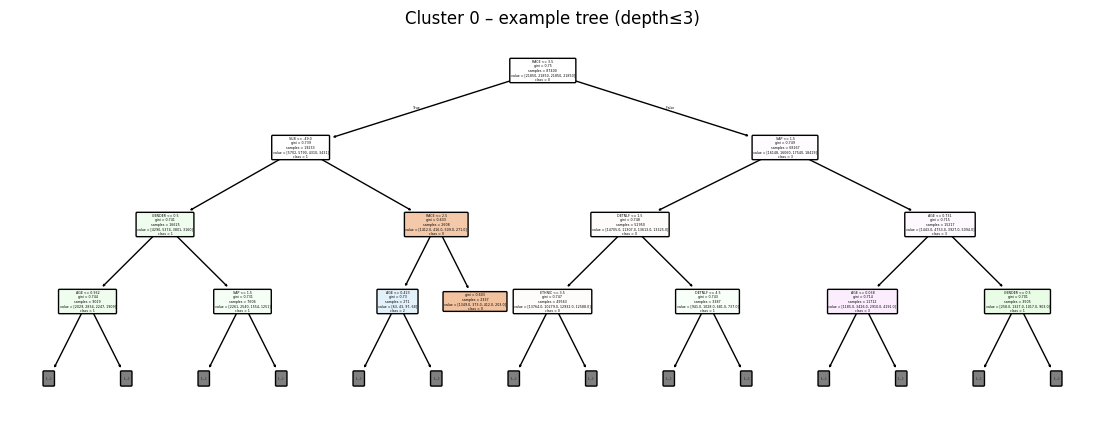


=========  CLUSTER 1  =========
원본 분포 : Counter({1: 646408, 2: 565536, 3: 265910, 0: 57816})

[Balanced RF 성능] 
              precision    recall  f1-score   support

           0      0.456     0.020     0.038     57816
           1      0.587     0.149     0.238    646408
           2      0.369     0.429     0.397    565536
           3      0.236     0.631     0.344    265910

    accuracy                          0.331   1535670
   macro avg      0.412     0.307     0.254   1535670
weighted avg      0.441     0.331     0.307   1535670


상위 15개 Feature Importances
AGE                 0.252749
SUB                 0.221646
ETHNIC              0.158229
SAP                 0.139065
RACE                0.107491
DETNLF              0.068044
GENDER              0.052776
YEAR                0.000000
STATEFIP_CLUSTER    0.000000
dtype: float64


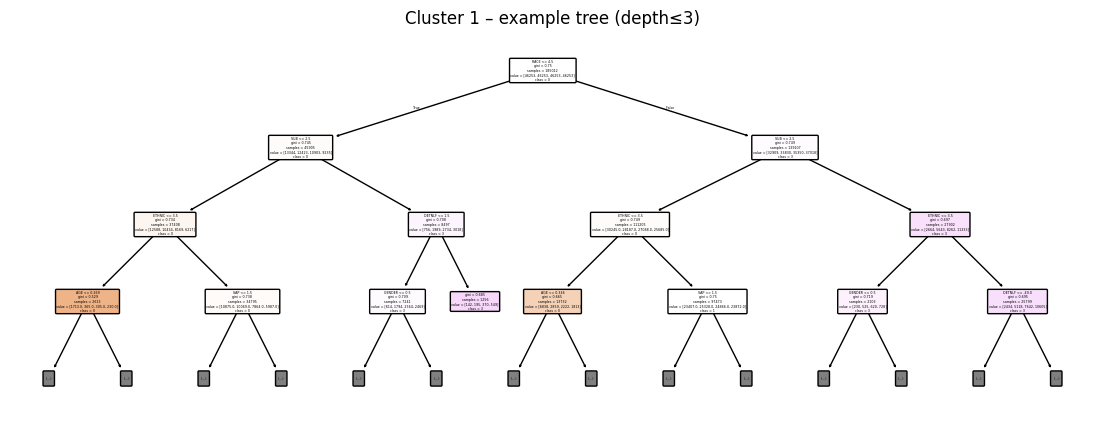


=========  CLUSTER 2  =========
원본 분포 : Counter({1: 399245, 0: 383490, 2: 348754, 3: 111966})

[Balanced RF 성능] 
              precision    recall  f1-score   support

           0      0.990     0.185     0.312    383490
           1      0.409     0.043     0.078    399245
           2      0.296     0.475     0.365    348754
           3      0.148     0.752     0.247    111966

    accuracy                          0.272   1243455
   macro avg      0.461     0.364     0.250   1243455
weighted avg      0.533     0.272     0.246   1243455


상위 15개 Feature Importances
SAP                 0.705999
AGE                 0.124552
SUB                 0.062179
DETNLF              0.044130
RACE                0.029604
GENDER              0.022526
ETHNIC              0.011010
YEAR                0.000000
STATEFIP_CLUSTER    0.000000
dtype: float64


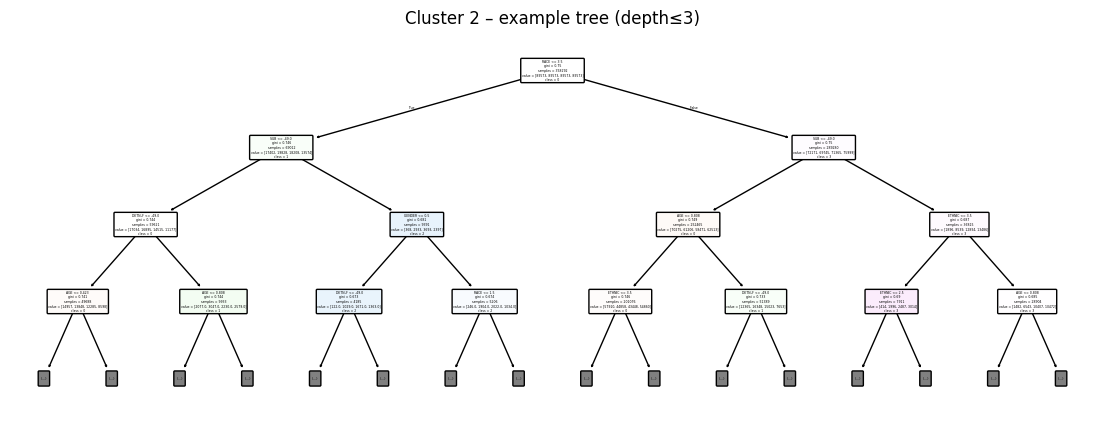


=========  CLUSTER 3  =========
원본 분포 : Counter({1: 807753, 2: 313757, 3: 103670, 0: 100795})

[Balanced RF 성능] 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000    100795
           1      0.692     0.425     0.526    807753
           2      0.291     0.417     0.342    313757
           3      0.136     0.498     0.214    103670

    accuracy                          0.396   1325975
   macro avg      0.280     0.335     0.271   1325975
weighted avg      0.501     0.396     0.418   1325975


상위 15개 Feature Importances
RACE                0.327250
SUB                 0.179241
AGE                 0.155727
SAP                 0.144094
ETHNIC              0.106396
DETNLF              0.055320
GENDER              0.031972
YEAR                0.000000
STATEFIP_CLUSTER    0.000000
dtype: float64


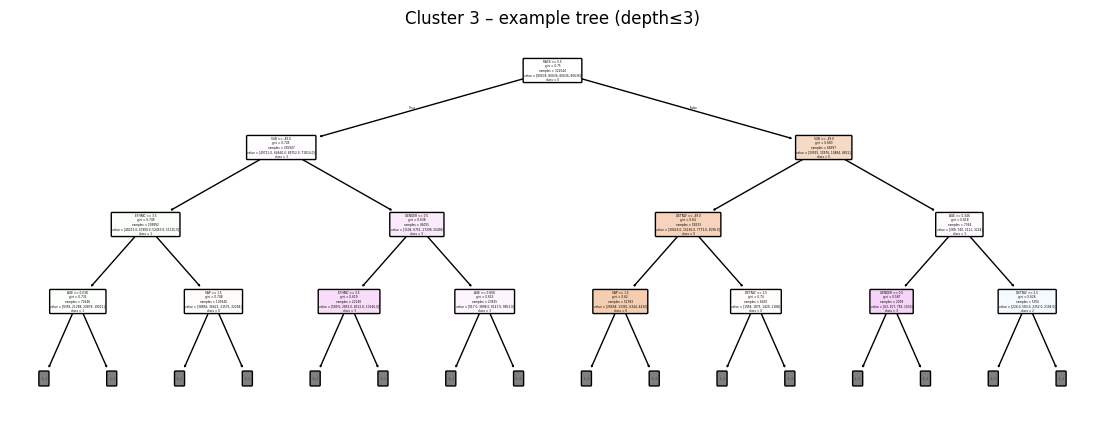

In [3]:
# --------------------------------------------------------------------------- #
# 0. 필요한 라이브러리
# --------------------------------------------------------------------------- #
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, precision_score, recall_score, f1_score
)
from imblearn.ensemble import BalancedRandomForestClassifier   # ★ 핵심
from sklearn.tree import export_text, plot_tree                # 규칙 프린트용 (선택)

# 기존 변수들 그대로
CLUSTER_COL   = "STATEFIP_CLUSTER"
TARGET_COL    = "NUMMHS"
EXCLUDED_COLS = [
    "MH1", "MH2", "MH3", "NUMMHS",
    "TRAUSTREFLG", "ANXIETYFLG", "ADHDFLG", "CONDUCTFLG", "DELIRDEMFLG",
    "BIPOLARFLG", "DEPRESSFLG", "ODDFLG", "PDDFLG", "PERSONFLG",
    "SCHIZOFLG", "ALCSUBFLG", "OTHERDISFLG", "SMISED", "CASEID",
    "CMPSERVICE", "RTCSERVICE", "IJSSERVICE", "OPISERVICE", "SPHSERVICE","STATEFIP","REGION","DIVISION"
]
METRIC_PER_CLASS = {0:"precision", 1:"f1", 2:"recall", 3:"recall"}
SEARCH_GRID   = np.linspace(0.05, 0.95, 19)
metric_fn     = {"precision": precision_score,
                 "recall":    recall_score,
                 "f1":        f1_score}

# --------------------------------------------------------------------------- #
# 1. 유틸 : threshold 튜닝 & 적용 (기존 그대로)
# --------------------------------------------------------------------------- #
def tune_thresholds(y_true, proba, metric_map):
    thresholds = {}
    for cls in range(proba.shape[1]):
        best_t, best_s = 0.5, -1
        scorer = metric_fn[metric_map.get(cls, "f1")]
        for t in SEARCH_GRID:
            y_bin  = (y_true == cls).astype(int)
            y_pred = (proba[:, cls] >= t).astype(int)
            score  = scorer(y_bin, y_pred, zero_division=0)
            if score > best_s:
                best_t, best_s = t, score
        thresholds[cls] = best_t
    return thresholds

def predict_with_thresholds(proba, thr_dict):
    adj = proba - np.array([thr_dict[c] for c in sorted(thr_dict)])
    return np.argmax(adj, axis=1)

# --------------------------------------------------------------------------- #
# 2. 클러스터 별 BRF 학습 함수
# --------------------------------------------------------------------------- #
def train_brf_on_cluster(df_cluster, cid):
    print(f"\n=========  CLUSTER {cid}  =========")
    X = df_cluster.drop(columns=EXCLUDED_COLS, errors="ignore")
    y = df_cluster[TARGET_COL]
    print("원본 분포 :", Counter(y))

    # 2-1. 학습/검증 분리
    X_tr, X_val, y_tr, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # 2-2. Balanced RF
    brf = BalancedRandomForestClassifier(
        n_estimators=400,
        max_depth=None,            # 필요 시 15 정도로 제한
        min_samples_leaf=50,       # 너무 깊어지지 않도록
        max_features="sqrt",
        sampling_strategy="auto",  # 각 부트스트랩에서 클래스 균형
        random_state=42,
        n_jobs=-1
    ).fit(X_tr, y_tr)

    # 2-3. threshold 튜닝
    thr = tune_thresholds(y_val, brf.predict_proba(X_val), METRIC_PER_CLASS)

    # 2-4. 최종 평가 (원본 데이터 전체)
    y_pred = predict_with_thresholds(brf.predict_proba(X), thr)
    print("\n[Balanced RF 성능] ")
    print(classification_report(y, y_pred, digits=3))

    # 2-5. 변수 중요도 TOP 15
    imp = (
        pd.Series(brf.feature_importances_, index=X.columns)
          .sort_values(ascending=False)
          .head(15)
    )
    print("\n상위 15개 Feature Importances")
    print(imp)

    # (선택) 첫 번째 결정트리 그림으로 맛보기
    est0 = brf.estimators_[0]
    plt.figure(figsize=(14,5))
    plot_tree(est0,
              feature_names=X.columns,
              class_names=[str(c) for c in sorted(y.unique())],
              max_depth=3, filled=True, rounded=True)
    plt.title(f"Cluster {cid} – example tree (depth≤3)")
    plt.show()

    return brf, thr

# --------------------------------------------------------------------------- #
# 3. 클러스터 루프 실행
# --------------------------------------------------------------------------- #
models = {}
for cid, df_sub in df.groupby(CLUSTER_COL):
    models[cid] = train_brf_on_cluster(df_sub.copy(), cid)
